In [8]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import numpy.ma as ma
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable
import math

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


headout_dir = '/home/maojiajing/cernbox/www/LLP/20190221'
fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [20]:
cnt = 0
MASK = False

for k,v in fpath.iteritems():
    #print k, v, cnt
    tree[k] = rtnp.root2array(v)
    
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in [ 'gParticleMotherId', 'gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
            #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print i, xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
        #mx[v] = ma.masked_array(ten_gen_var[v], mask=[0, 0, 0, 0, 0, 0])
    #print ten_gen_var['gParticlePt'][:,4]
    print ten_gen_var['gParticleMotherId'][0]

    #gen particle id  
    sel_p_daughter = ten_gen_var['gParticleMotherId'] == 2212
  
    #evt = ten_gen_var['eventNum'][sel_p]
    p_daughter_e = ten_gen_var['gParticleE'][sel_p_daughter]
    p_daughter_pt = ten_gen_var['gParticlePt'][sel_p_daughter]
    p_daughter_eta = ten_gen_var['gParticleEta'][sel_p_daughter]

    #print len(evt)
    #print p_daughter_e
  

[ 2.212000e+03  2.212000e+03 -2.000000e+00 -2.000000e+00  9.000006e+06
  9.000006e+06  9.000007e+06  9.000007e+06 -2.400000e+01 -2.400000e+01]
[ 2.100000e+01  2.212000e+03 -2.000000e+00 -2.000000e+00  9.000006e+06
  9.000006e+06  9.000007e+06  9.000007e+06  2.300000e+01  2.300000e+01]
[ 2.100000e+01  2.212000e+03 -2.000000e+00 -2.000000e+00  2.000000e+00
  9.000006e+06  9.000006e+06  9.000007e+06  9.000007e+06 -2.400000e+01]
[2.212000e+03 1.000000e+00 2.100000e+01 9.000006e+06 9.000006e+06
 9.000007e+06 9.000007e+06 4.330000e+02 1.110000e+02 1.110000e+02]
[ 2.100000e+01  2.212000e+03 -1.000000e+00 -1.000000e+00  2.400000e+01
  2.400000e+01  9.000006e+06  9.000006e+06  9.000007e+06  9.000007e+06]


In [4]:
cnt = 0
for k,v in fpath.iteritems():
    #print k, v, cnt
    tree[k] = rtnp.root2array(v)
    
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE', 'gLLP_daughter_travel_time']:
        tmp_2 = []
        for x in tree[k][v]:
            #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]

    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]
    
    # daughter of LLP
    gLLP_daughter_travel_time = tree[k]['gLLP_daughter_travel_time']
    eventNum = tree[k]['eventNum']
    #print gLLP_daughter_travel_time
    print k, "len of gLLP_daughter = ", len(gLLP_daughter_travel_time), ", len of eventNum = ", len(eventNum), ", len of b_pt = ", len(b_pt), ", len of bhat_pt = ", len(bhat_pt)
    b_t = gLLP_daughter_travel_time[0]
    bhat_t = gLLP_daughter_travel_time[1]
    
    #for i,x in enumerate(gLLP_daughter_travel_time):
        #print i,x
        #print x[0], x[1], x[2], x[3]
        #0 is b-quark, 1 is anti-b quark
        #x is not -666 means inside Ecal Barrel
        
    #central fraction of b-quarks, within eta < 1.48, hit inside EB
    b_central = float(len(b_t[b_t != -666]))/float(len(b_eta))
    #central fraction of anti-b-quarks, within eta < 1.48
    bhat_central = float(len(bhat_t[bhat_t != -666]))/float(len(bhat_eta))
        
    #print "central (|eta|<1.48) b-quark fraction:", round (b_central*100, 2), "%"
    #print "central (|eta|<1.48) anti-b-quark fraction:", round (bhat_central*100, 2), "%" 
    #print "barrel-barrel fraction of events = ", round (b_central*bhat_central*100 , 2), " %"
    #print "barrel-endcap fraction of events = ", round ((b_central*(1-bhat_central) + (1-b_central)*bhat_central)*100 , 2), " %"
    #print "endcap-endcap fraction of events = ", round ((1-b_central)*(1-bhat_central)*100 , 2), " %"
    
    
    frac_result[k] = Bauble()
 

    frac_result[k].frac_b_cen = b_central
    frac_result[k].frac_bhat_cen = bhat_central
    frac_result[k].frac_BB = b_central*bhat_central
    frac_result[k].frac_BE = b_central*(1-bhat_central) + (1-b_central)*bhat_central
    frac_result[k].frac_EE = (1-b_central)*(1-bhat_central)
    
 
    
    cnt += 1
    

print '\n\n======================= Summary =============================='
#table =  PrettyTable(['Mass_X [GeV]', 'b-quark central fraction', '#bar(b)-quark central fraction', 'Barrel-Barrel fraction [%]', 'Barrel-Endcap fraction [%]', 'Endcap-Endcap fraction [%]'])
table =  PrettyTable(['Mass_X [GeV]', 'b central [%]', '#bar(b) central [%]', 'Barrel-Barrel [%]', 'Barrel-Endcap [%]', 'Endcap-Endcap [%]'])
for m, frac in frac_result.iteritems():
    #if (frac.frac.frac_b_cen>-1):
    print m, frac.frac_b_cen
    row = [str(m), round (frac.frac_b_cen*100, 2), round (frac.frac_bhat_cen*100, 2), round (frac.frac_BB*100, 2), round (frac.frac_BE*100, 2), round (frac.frac_EE*100, 2) ]
        #row += [res.var[1], res.var[0], 'Yes' if res.AmpCorr else 'No']
    table.add_row(row)
        
print table
#table_txt = table.get_string(sort_key=operator.itemgetter(1, 0), sortby="Mass_X [GeV]")
table_txt = table.get_string()
with open(headout_dir+'/SummaryTable.txt','w') as file:
    file.write(table_txt)


WHm50ct1000mm len of gLLP_daughter =  3319 , len of eventNum =  3319 , len of b_pt =  3320 , len of bhat_pt =  3322
ZHm50ct1000mm len of gLLP_daughter =  8248 , len of eventNum =  8248 , len of b_pt =  9546 , len of bhat_pt =  9461
WHm50ct100mm len of gLLP_daughter =  8306 , len of eventNum =  8306 , len of b_pt =  8306 , len of bhat_pt =  8305
ggHm50ct100mmWISR len of gLLP_daughter =  1151 , len of eventNum =  1151 , len of b_pt =  1150 , len of bhat_pt =  1150
VBFHm50ct1000mm len of gLLP_daughter =  3765 , len of eventNum =  3765 , len of b_pt =  3763 , len of bhat_pt =  3762


======================= Summary ==============================
WHm50ct1000mm 0.00120481927711
ZHm50ct1000mm 0.0
VBFHm50ct1000mm 0.00106298166357
ggHm50ct100mmWISR 0.00173913043478
WHm50ct100mm 0.000481579581026
+-------------------+---------------+---------------------+-------------------+-------------------+-------------------+
|    Mass_X [GeV]   | b central [%] | #bar(b) central [%] | Barrel-Barrel [%] | Ba

In [21]:
cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
            #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]
   
    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]
   

    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]
  
    #central fraction of b-quarks, within eta < 1.48
    b_central = float(len(b_eta[np.abs(b_eta) < 1.48]))/float(len(b_eta))
    #central fraction of anti-b-quarks, within eta < 1.48
    bhat_central = float(len(bhat_eta[np.abs(bhat_eta) < 1.48]))/float(len(bhat_eta)) 

    print "central (|eta|<1.48) b-quark fraction:", round (b_central*100, 2), "%"
    print "central (|eta|<1.48) anti-b-quark fraction:", round (bhat_central*100, 2), "%" 
    print "barrel-barrel fraction of events = ", round (b_central*bhat_central*100 , 2), " %"
    print "barrel-endcap fraction of events = ", round ((b_central*(1-bhat_central) + (1-b_central)*bhat_central)*100 , 2), " %"
    print "endcap-endcap fraction of events = ", round ((1-b_central)*(1-bhat_central)*100 , 2), " %"
    
    frac_result[k] = Bauble()
 

    frac_result[k].frac_b_cen = b_central
    frac_result[k].frac_bhat_cen = bhat_central
    frac_result[k].frac_BB = b_central*bhat_central
    frac_result[k].frac_BE = b_central*(1-bhat_central) + (1-b_central)*bhat_central
    frac_result[k].frac_EE = (1-b_central)*(1-bhat_central)
    
 
    
    cnt += 1
    

print '\n\n======================= Summary =============================='
#table =  PrettyTable(['Mass_X [GeV]', 'b-quark central fraction', '#bar(b)-quark central fraction', 'Barrel-Barrel fraction [%]', 'Barrel-Endcap fraction [%]', 'Endcap-Endcap fraction [%]'])
table =  PrettyTable(['Mass_X [GeV]', 'b central [%]', '#bar(b) central [%]', 'Barrel-Barrel [%]', 'Barrel-Endcap [%]', 'Endcap-Endcap [%]'])
for m, frac in frac_result.iteritems():
    #if (frac.frac.frac_b_cen>-1):
    print m, frac.frac_b_cen
    row = [str(m), round (frac.frac_b_cen*100, 2), round (frac.frac_bhat_cen*100, 2), round (frac.frac_BB*100, 2), round (frac.frac_BE*100, 2), round (frac.frac_EE*100, 2) ]
        #row += [res.var[1], res.var[0], 'Yes' if res.AmpCorr else 'No']
    table.add_row(row)
        
print table
#table_txt = table.get_string(sort_key=operator.itemgetter(1, 0), sortby="Mass_X [GeV]")
table_txt = table.get_string()
with open(headout_dir+'/SummaryTable_eta.txt','w') as file:
    file.write(table_txt)


WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
central (|eta|<1.48) b-quark fraction: 51.63 %
central (|eta|<1.48) anti-b-quark fraction: 50.69 %
barrel-barrel fraction of events =  26.17  %
barrel-endcap fraction of events =  49.98  %
endcap-endcap fraction of events =  23.85  %
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
central (|eta|<1.48) b-quark fraction: 51.95 %
central (|eta|<1.48) anti-b-quark fraction: 52.63 %
barrel-barrel fraction of events =  27.34  %
barrel-endcap fraction of events =  49.9  %
endcap-endcap fraction of events =  22.76  %
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
central (|eta|<1.48) b-quark fraction: 51.41 %
central (|eta|<1.48) anti-b-quark fraction: 51.27 %
barrel-barrel fraction of events =  26.36  %
barrel-endcap fraction of events =  49.96  %
endcap-endcap

WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
WHm50ct1000mm len of gLLP_daughter =  3319 , len of eventNum =  3319 , len of b_pt =  3320 , len of bhat_pt =  3322
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
ZHm50ct1000mm len of gLLP_daughter =  8248 , len of eventNum =  8248 , len of b_pt =  9558 , len of bhat_pt =  9558
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
WHm50ct100mm len of gLLP_daughter =  8306 , len of eventNum =  8306 , len of b_pt =  8308 , len of bhat_pt =  8308
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3
ggHm50ct100mmWISR len of gLLP_daughter =  1151 , len of eventNum =  1151 , len of b_pt =  1151 , len of bhat_pt =  1151
VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtu

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/LLP_eta.png has been created


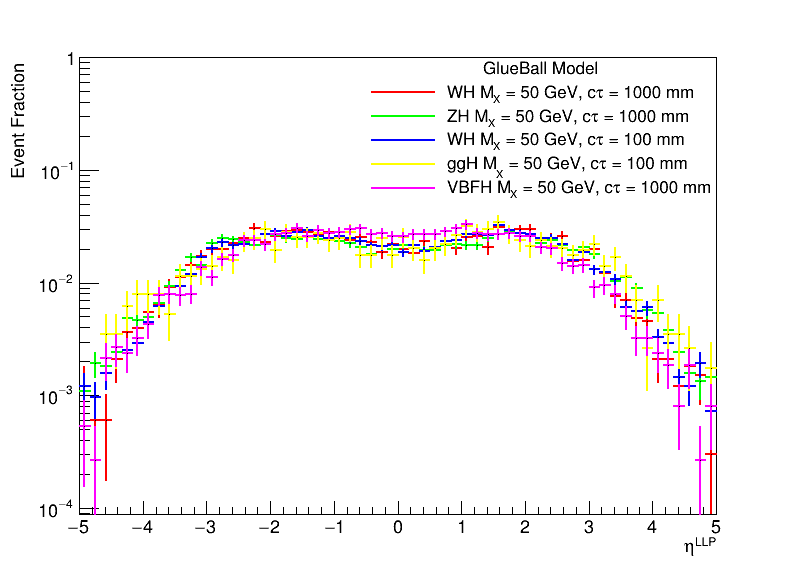

In [5]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}

fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'

 

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=20

h = {}
c = rt.TCanvas('c','c', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]
    
    #print b_pt[0], b_eta[0], b_phi[0], b_e[0]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]
    
    #print bhat_pt[0], bhat_eta[0], bhat_phi[0], bhat_e[0]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    #print len(b_pt), len(bhat_pt)
    
    # daughter of LLP
    gLLP_daughter_travel_time = tree[k]['gLLP_daughter_travel_time']
    eventNum = tree[k]['eventNum']
    #print gLLP_daughter_travel_time
    print k, "len of gLLP_daughter = ", len(gLLP_daughter_travel_time), ", len of eventNum = ", len(eventNum), ", len of b_pt = ", len(b_pt), ", len of bhat_pt = ", len(bhat_pt)
    b_t = gLLP_daughter_travel_time[0]
    bhat_t = gLLP_daughter_travel_time[1]
    
    
    #for i in range(min(len(b_pt),len(bhat_pt))):
    for i in range(len(eventNum)):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        #print b_pt[i],b_eta[i],b_phi[i], b_e[i]
        b_p4.append(tmp_p4_b)
        
        tmp_p4_bhat = rt.TLorentzVector()
        #tmp_p4_bhat.SetPtEtaPhiE(0,0,0,0)
        #print bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i]
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
         
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
        
    h['llp_eta'+str(k)] = create_TH1D(llp_eta, axis_title=['#eta^{LLP}', 'Event Fraction'], name='', binning=[60,-5,5])
    h['llp_eta'+str(k)].SetLineColor(cnt+2)
    h['llp_eta'+str(k)].SetStats(0)
    #h['llp_eta'+str(k)].SetMaximum(10*h['llp_eta'+str(k)].GetMaximum())
    h['llp_eta'+str(k)].Scale(1/h['llp_eta'+str(k)].Integral())
    h['llp_eta'+str(k)].SetLineWidth(2)
    h['llp_eta'+str(k)].SetMaximum(1)
    h['llp_eta'+str(k)].Draw('same')

    legall.AddEntry(h['llp_eta'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_eta.png')
 


WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3
VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root 4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/LLP_pt.png has been created


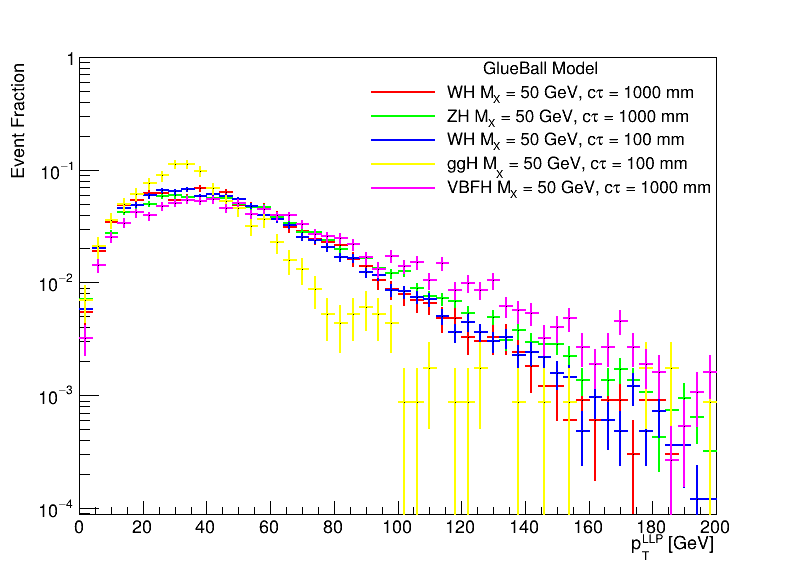

In [117]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}

 
fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(min(len(b_pt),len(bhat_pt))):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['llp_pt'+str(k)] = create_TH1D(llp_pt, axis_title=['p_{T}^{LLP} [GeV]', 'Event Fraction'], name='', binning=[50,0,200])
    h['llp_pt'+str(k)].SetLineColor(cnt+2)
    h['llp_pt'+str(k)].SetStats(0)
    #h['llp_pt'+str(k)].SetMaximum(10*h['llp_pt'+str(k)].GetMaximum())
    h['llp_pt'+str(k)].Scale(1/h['llp_pt'+str(k)].Integral())
    h['llp_pt'+str(k)].SetLineWidth(2)
    h['llp_pt'+str(k)].SetMaximum(1)
    h['llp_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['llp_pt'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_pt.png')



 
 


WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3
VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root 4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/LLP_phi.png has been created


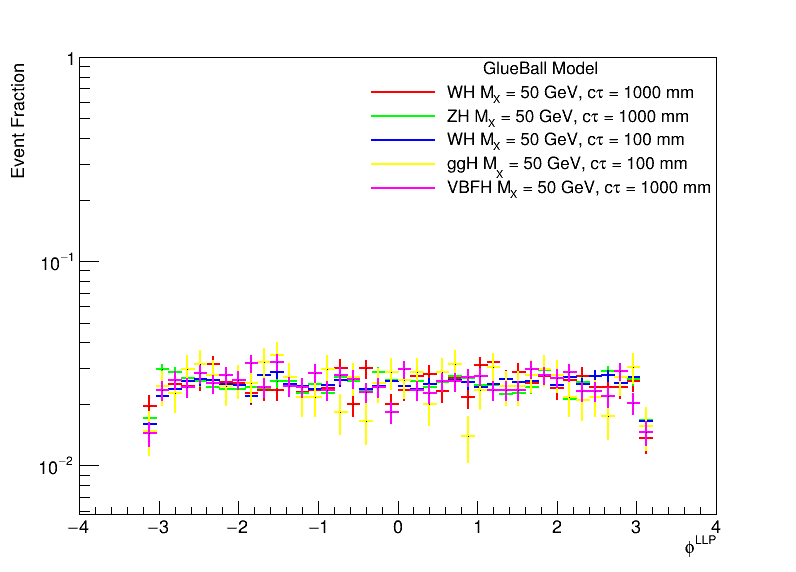

In [6]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(min(len(b_pt),len(bhat_pt))):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['llp_phi'+str(k)] = create_TH1D(llp_phi, axis_title=['#phi^{LLP}', 'Event Fraction'], name='', binning=[50,-4,4])
    h['llp_phi'+str(k)].SetLineColor(cnt+2)
    h['llp_phi'+str(k)].SetStats(0)
    #h['llp_phi'+str(k)].SetMaximum(10*h['llp_phi'+str(k)].GetMaximum())
    h['llp_phi'+str(k)].Scale(1/h['llp_phi'+str(k)].Integral())
    h['llp_phi'+str(k)].SetLineWidth(2)
    h['llp_phi'+str(k)].SetMaximum(1)    
    h['llp_phi'+str(k)].Draw('same')

  
    legall.AddEntry(h['llp_phi'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_phi.png')



 

WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3
VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root 4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/LLP_e.png has been created


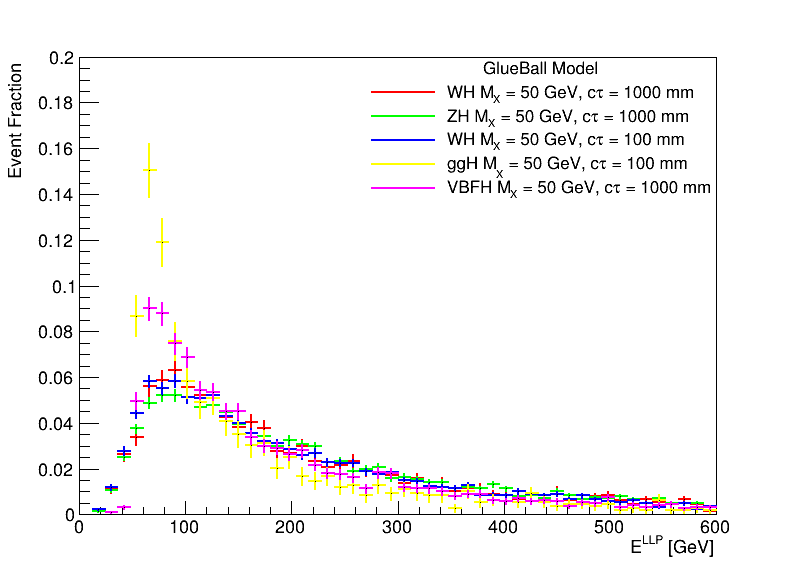

In [151]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(min(len(b_pt),len(bhat_pt))):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['llp_e'+str(k)] = create_TH1D(llp_e, axis_title=['E^{LLP} [GeV]', 'Event Fraction'], name='', binning=[50,0,600])
    h['llp_e'+str(k)].SetLineColor(cnt+2)
    h['llp_e'+str(k)].SetStats(0)
    #h['llp_e'+str(k)].SetMaximum(3*h['llp_e'+str(k)].GetMaximum())
    h['llp_e'+str(k)].Scale(1/h['llp_e'+str(k)].Integral())
    h['llp_e'+str(k)].SetLineWidth(2)
    h['llp_e'+str(k)].SetMaximum(0.2)        
    h['llp_e'+str(k)].Draw('same')

  
    legall.AddEntry(h['llp_e'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
#c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_e.png')




WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3
VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root 4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/b_e.png has been created


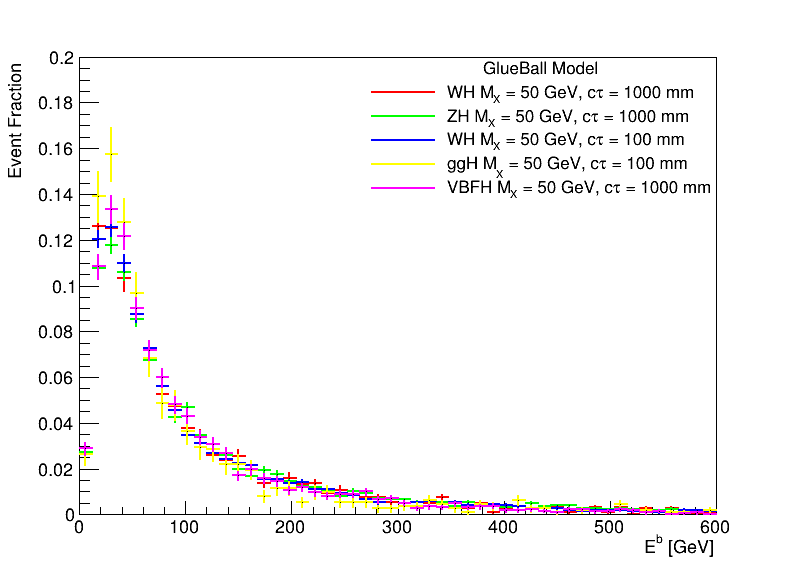

In [125]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    h['b_e'+str(k)] = create_TH1D(b_e, axis_title=['E^{b} [GeV]', 'Event Fraction'], name='', binning=[50,0,600])
    h['b_e'+str(k)].SetLineColor(cnt+2)
    h['b_e'+str(k)].SetStats(0)
    #h['b_e'+str(k)].SetMaximum(3*h['b_e'+str(k)].GetMaximum())
    h['b_e'+str(k)].Scale(1/h['b_e'+str(k)].Integral())
    h['b_e'+str(k)].SetLineWidth(2)
    h['b_e'+str(k)].SetMaximum(0.2)        
    h['b_e'+str(k)].Draw('same')

  
    legall.AddEntry(h['b_e'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
#c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/b_e.png')




WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3
VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root 4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/bbar_e.png has been created


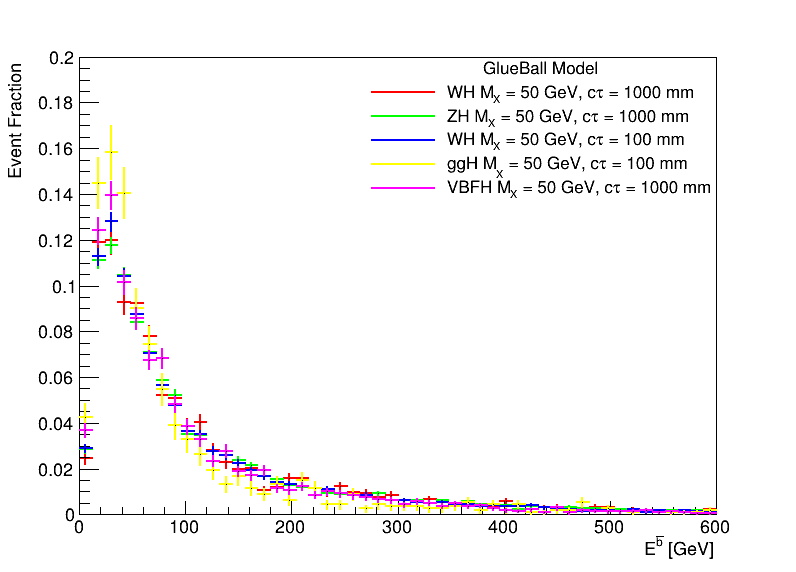

In [127]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}

fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    h['bhat_e'+str(k)] = create_TH1D(bhat_e, axis_title=['E^{#bar{b}} [GeV]', 'Event Fraction'], name='', binning=[50,0,600])
    h['bhat_e'+str(k)].SetLineColor(cnt+2)
    h['bhat_e'+str(k)].SetStats(0)
    #h['bhat_e'+str(k)].SetMaximum(3*h['bhat_e'+str(k)].GetMaximum())
    h['bhat_e'+str(k)].Scale(1/h['bhat_e'+str(k)].Integral())
    h['bhat_e'+str(k)].SetLineWidth(2)
    h['bhat_e'+str(k)].SetMaximum(0.2)            
    h['bhat_e'+str(k)].Draw('same')

  
    legall.AddEntry(h['bhat_e'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
#c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/bbar_e.png')




WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3
VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root 4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/b_pt.png has been created


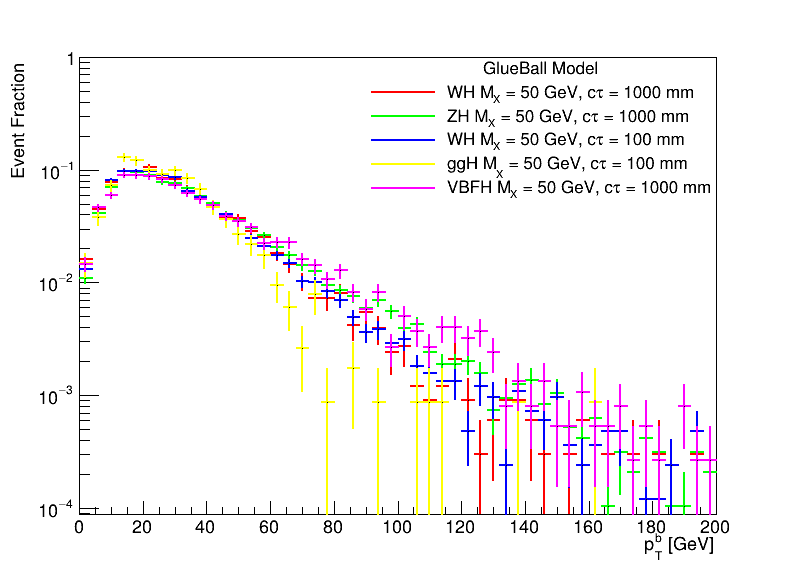

In [128]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    h['b_pt'+str(k)] = create_TH1D(b_pt, axis_title=['p_{T}^{b} [GeV]', 'Event Fraction'], name='', binning=[50,0,200])
    h['b_pt'+str(k)].SetLineColor(cnt+2)
    h['b_pt'+str(k)].SetStats(0)
    #h['b_pt'+str(k)].SetMaximum(10*h['b_pt'+str(k)].GetMaximum())
    h['b_pt'+str(k)].Scale(1/h['b_pt'+str(k)].Integral())
    h['b_pt'+str(k)].SetLineWidth(2)
    h['b_pt'+str(k)].SetMaximum(1)            
    h['b_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['b_pt'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/b_pt.png')




WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3
VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root 4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/bbar_pt.png has been created


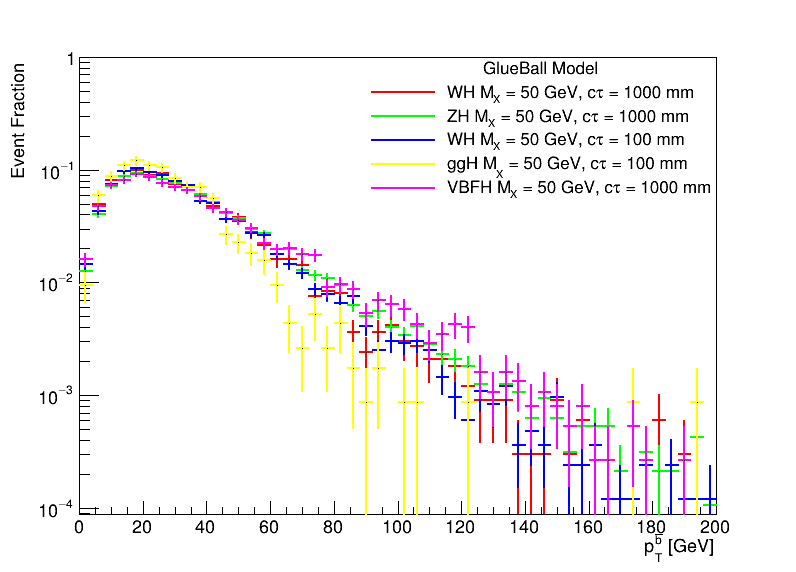

In [129]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}

fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    h['bhat_pt'+str(k)] = create_TH1D(bhat_pt, axis_title=['p_{T}^{#bar{b}} [GeV]', 'Event Fraction'], name='', binning=[50,0,200])
    h['bhat_pt'+str(k)].SetLineColor(cnt+2)
    h['bhat_pt'+str(k)].SetStats(0)
    #h['bhat_pt'+str(k)].SetMaximum(10*h['bhat_pt'+str(k)].GetMaximum())
    h['bhat_pt'+str(k)].Scale(1/h['bhat_pt'+str(k)].Integral())
    h['bhat_pt'+str(k)].SetLineWidth(2)
    h['bhat_pt'+str(k)].SetMaximum(1)                
    h['bhat_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['bhat_pt'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/bbar_pt.png')




WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3
VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root 4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/b_phi.png has been created


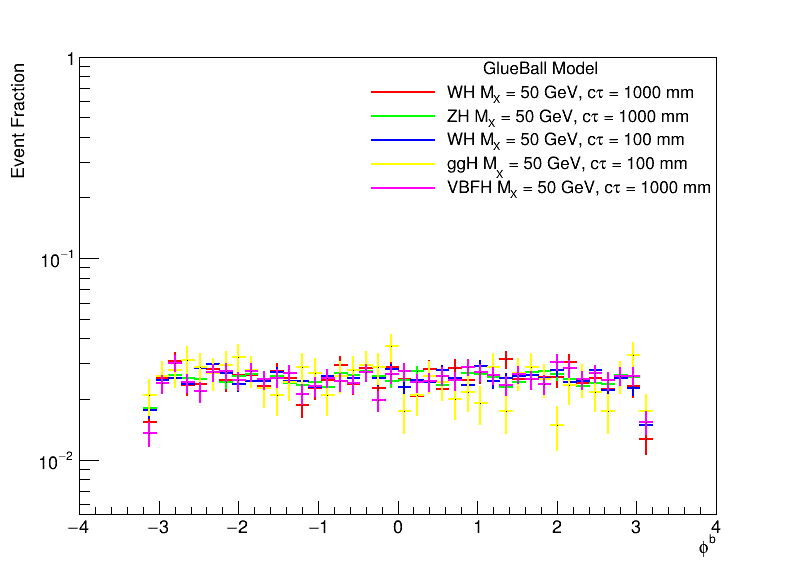

In [133]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    h['b_phi'+str(k)] = create_TH1D(b_phi, axis_title=['#phi^{b}', 'Event Fraction'], name='', binning=[50,-4,4])
    h['b_phi'+str(k)].SetLineColor(cnt+2)
    h['b_phi'+str(k)].SetStats(0)
    #h['b_phi'+str(k)].SetMaximum(10*h['b_phi'+str(k)].GetMaximum())
    h['b_phi'+str(k)].Scale(1/h['b_phi'+str(k)].Integral())
    h['b_phi'+str(k)].SetLineWidth(2)
    h['b_phi'+str(k)].SetMaximum(1)            
    h['b_phi'+str(k)].Draw('same')

  
    legall.AddEntry(h['b_phi'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/b_phi.png')




WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3
VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root 4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/bbar_phi.png has been created


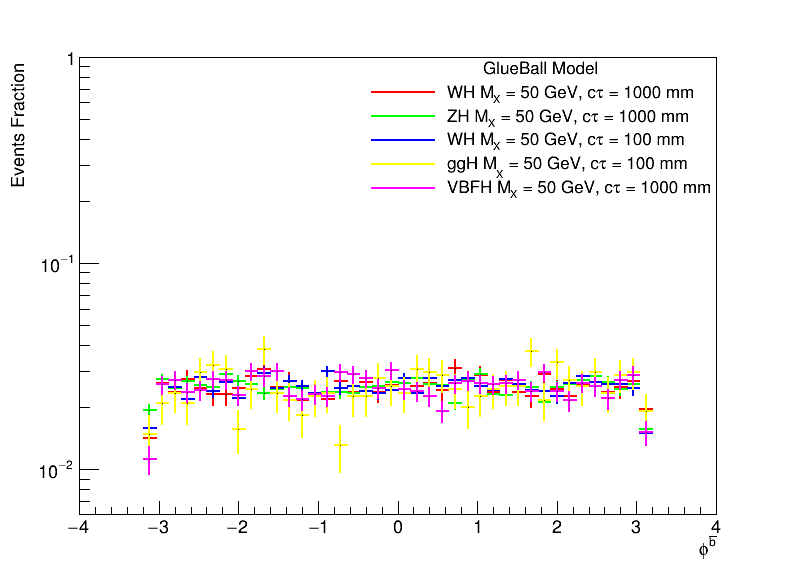

In [135]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    h['bhat_phi'+str(k)] = create_TH1D(bhat_phi, axis_title=['#phi^{#bar{b}}', 'Events Fraction'], name='', binning=[50,-4,4])
    h['bhat_phi'+str(k)].SetLineColor(cnt+2)
    h['bhat_phi'+str(k)].SetStats(0)
    #h['bhat_phi'+str(k)].SetMaximum(10*h['bhat_phi'+str(k)].GetMaximum())
    h['bhat_phi'+str(k)].Scale(1/h['bhat_phi'+str(k)].Integral())
    h['bhat_phi'+str(k)].SetLineWidth(2)
    h['bhat_phi'+str(k)].SetMaximum(1)                
    h['bhat_phi'+str(k)].Draw('same')

  
    legall.AddEntry(h['bhat_phi'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/bbar_phi.png')



WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3
VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root 4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/b_eta.png has been created


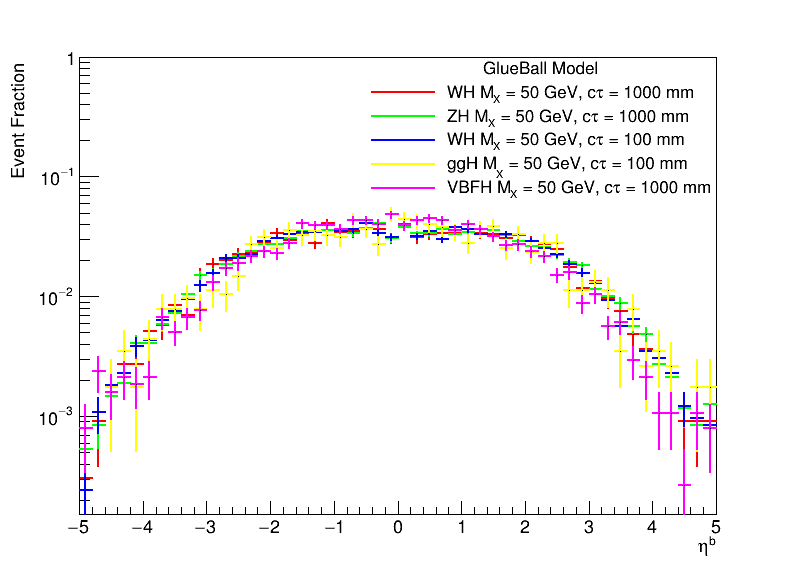

In [136]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    h['b_eta'+str(k)] = create_TH1D(b_eta, axis_title=['#eta^{b}', 'Event Fraction'], name='', binning=[50,-5,5])
    h['b_eta'+str(k)].SetLineColor(cnt+2)
    h['b_eta'+str(k)].SetStats(0)
    #h['b_eta'+str(k)].SetMaximum(10*h['b_eta'+str(k)].GetMaximum())
    h['b_eta'+str(k)].Scale(1/h['b_eta'+str(k)].Integral())
    h['b_eta'+str(k)].SetLineWidth(2)
    h['b_eta'+str(k)].SetMaximum(1)                
    h['b_eta'+str(k)].Draw('same')

  
    legall.AddEntry(h['b_eta'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/b_eta.png')




WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3
VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root 4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/bbar_eta.png has been created


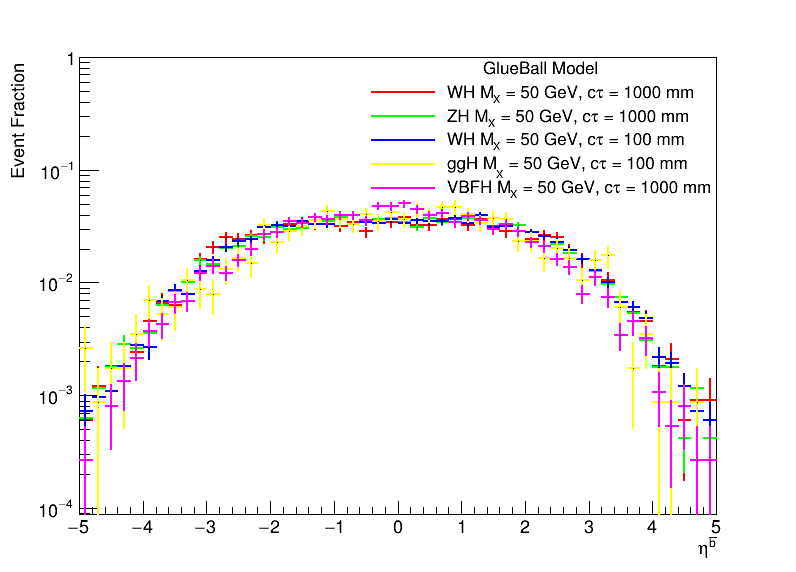

In [137]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}

fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    h['bhat_eta'+str(k)] = create_TH1D(bhat_eta, axis_title=['#eta^{#bar{b}}', 'Event Fraction'], name='', binning=[50,-5,5])
    h['bhat_eta'+str(k)].SetLineColor(cnt+2)
    h['bhat_eta'+str(k)].SetStats(0)
    #h['bhat_eta'+str(k)].SetMaximum(10*h['bhat_eta'+str(k)].GetMaximum())
    h['bhat_eta'+str(k)].Scale(1/h['bhat_eta'+str(k)].Integral())
    h['bhat_eta'+str(k)].SetLineWidth(2)
    h['bhat_eta'+str(k)].SetMaximum(1)                    
    h['bhat_eta'+str(k)].Draw('same')

  
    legall.AddEntry(h['bhat_eta'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/bbar_eta.png')




WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3
VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root 4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/LLP_e.png has been created


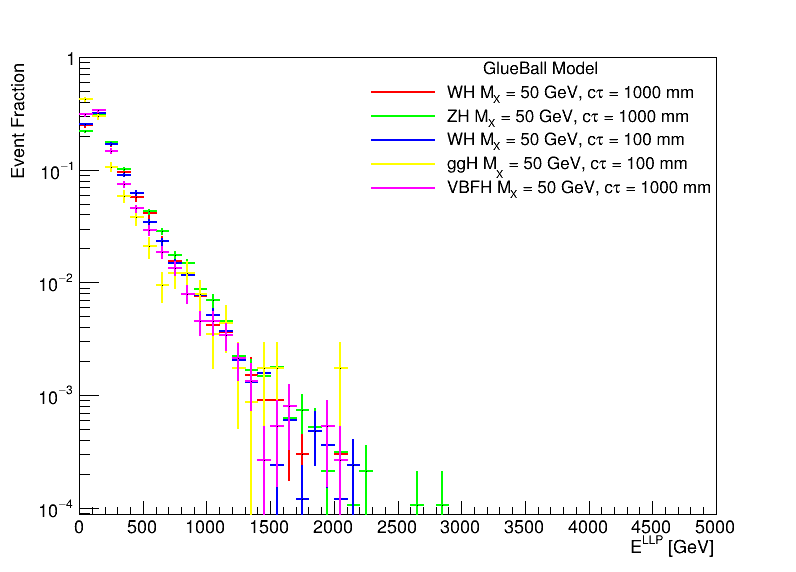

In [139]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}

fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(min(len(b_pt),len(bhat_pt))):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]
    
    #if(b_pt and bhat_pt):
    #    bb_ht = b_pt + bhat_pt

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['llp_e'+str(k)] = create_TH1D(llp_e, axis_title=['E^{LLP} [GeV]', 'Event Fraction'], name='', binning=[50,0,5000])
    h['llp_e'+str(k)].SetLineColor(cnt+2)
    h['llp_e'+str(k)].SetStats(0)
    #h['llp_e'+str(k)].SetMaximum(10*h['llp_e'+str(k)].GetMaximum())
    h['llp_e'+str(k)].Scale(1/h['llp_e'+str(k)].Integral())
    h['llp_e'+str(k)].SetLineWidth(2)
    h['llp_e'+str(k)].SetMaximum(1)                    
    h['llp_e'+str(k)].Draw('same')

  
    legall.AddEntry(h['llp_e'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_e.png')




WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3
VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root 4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/LLP_m.png has been created


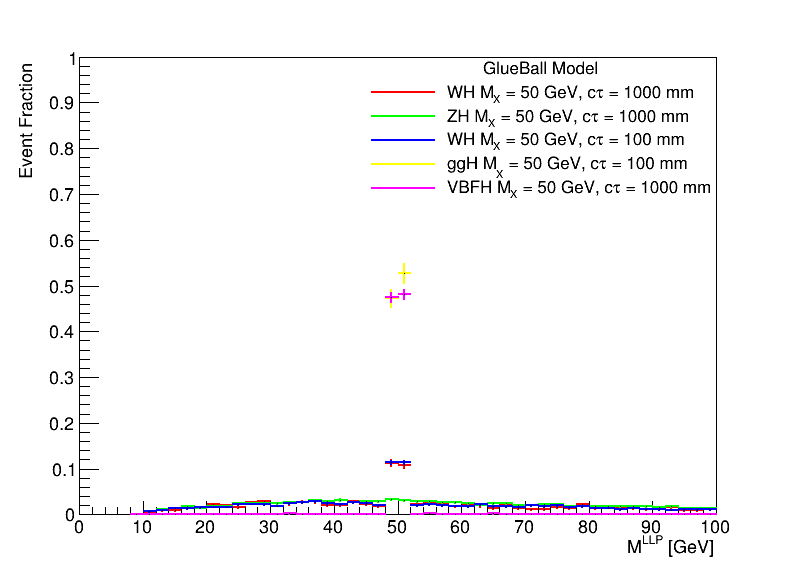

In [140]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'
label['m50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(min(len(b_pt),len(bhat_pt))):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]
    
    llp_m = [x.M() for x in llp_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['llp_m'+str(k)] = create_TH1D(llp_m, axis_title=['M^{LLP} [GeV]', 'Event Fraction'], name='', binning=[50,0,100])
    h['llp_m'+str(k)].SetLineColor(cnt+2)
    h['llp_m'+str(k)].SetStats(0)
    #h['llp_m'+str(k)].SetMaximum(10*h['llp_m'+str(k)].GetMaximum())
    h['llp_m'+str(k)].Scale(1/h['llp_m'+str(k)].Integral())
    h['llp_m'+str(k)].SetLineWidth(2)
    h['llp_m'+str(k)].SetMaximum(1)           
    h['llp_m'+str(k)].Draw('same')

  
    legall.AddEntry(h['llp_m'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
#c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_m.png')



WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3
VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root 4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/LLP_pz.png has been created


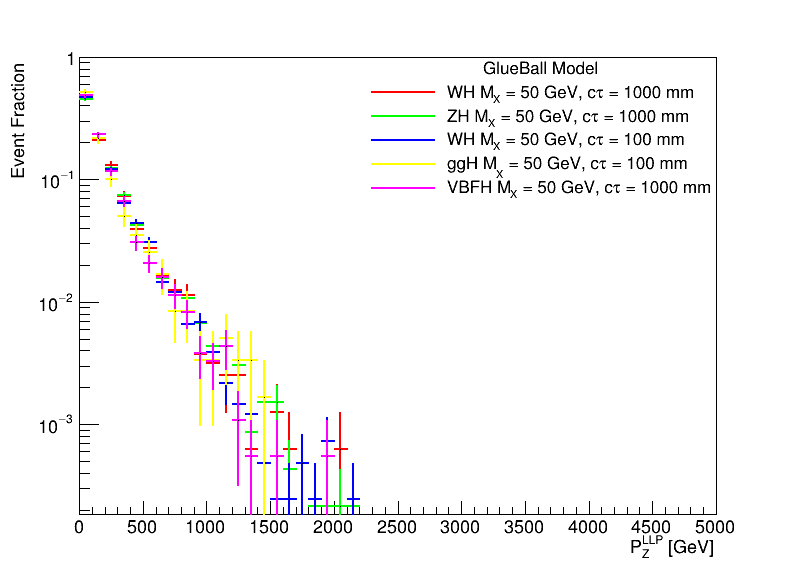

In [141]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(min(len(b_pt),len(bhat_pt))):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]
    
    llp_pz   = [x.Pz() for x in llp_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['llp_pz'+str(k)] = create_TH1D(llp_pz, axis_title=['P_{Z}^{LLP} [GeV]', 'Event Fraction'], name='', binning=[50,0,5000])
    h['llp_pz'+str(k)].SetLineColor(cnt+2)
    h['llp_pz'+str(k)].SetStats(0)
    #h['llp_pz'+str(k)].SetMaximum(10*h['llp_pz'+str(k)].GetMaximum())
    h['llp_pz'+str(k)].Scale(1/h['llp_pz'+str(k)].Integral())
    h['llp_pz'+str(k)].SetLineWidth(2)
    h['llp_pz'+str(k)].SetMaximum(1)           
    h['llp_pz'+str(k)].Draw('same')

  
    legall.AddEntry(h['llp_pz'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_pz.png')




WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3
VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root 4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/LLP_et.png has been created


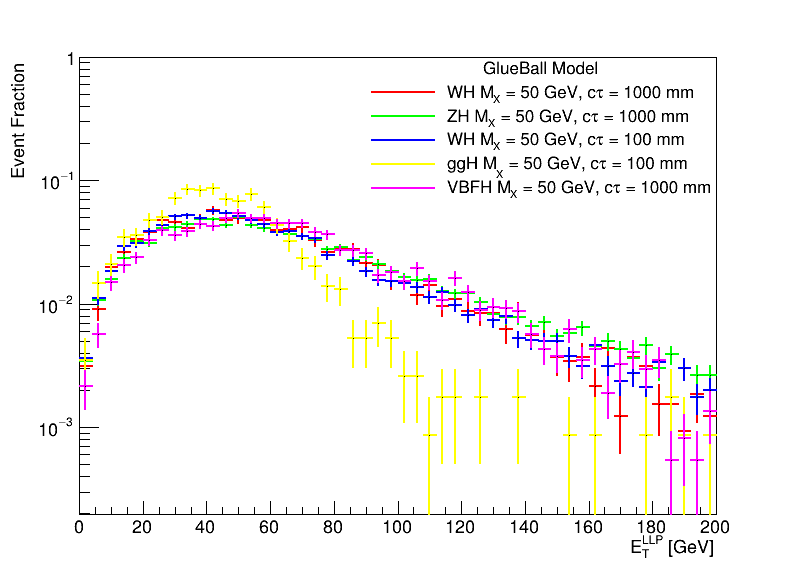

In [142]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(min(len(b_pt),len(bhat_pt))):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]
    
    llp_pz   = [x.Pz() for x in llp_p4]
    llp_et   = [x.Et() for x in llp_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['llp_et'+str(k)] = create_TH1D(llp_et, axis_title=['E_{T}^{LLP} [GeV]', 'Event Fraction'], name='', binning=[50,0,200])
    h['llp_et'+str(k)].SetLineColor(cnt+2)
    h['llp_et'+str(k)].SetStats(0)
    #h['llp_et'+str(k)].SetMaximum(10*h['llp_et'+str(k)].GetMaximum())    
    h['llp_et'+str(k)].Scale(1/h['llp_et'+str(k)].Integral())
    h['llp_et'+str(k)].SetLineWidth(2)
    h['llp_et'+str(k)].SetMaximum(1)           
    h['llp_et'+str(k)].Draw('same')

  
    legall.AddEntry(h['llp_et'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_et.png')




WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3
VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root 4


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/h_pt_gen.png has been created


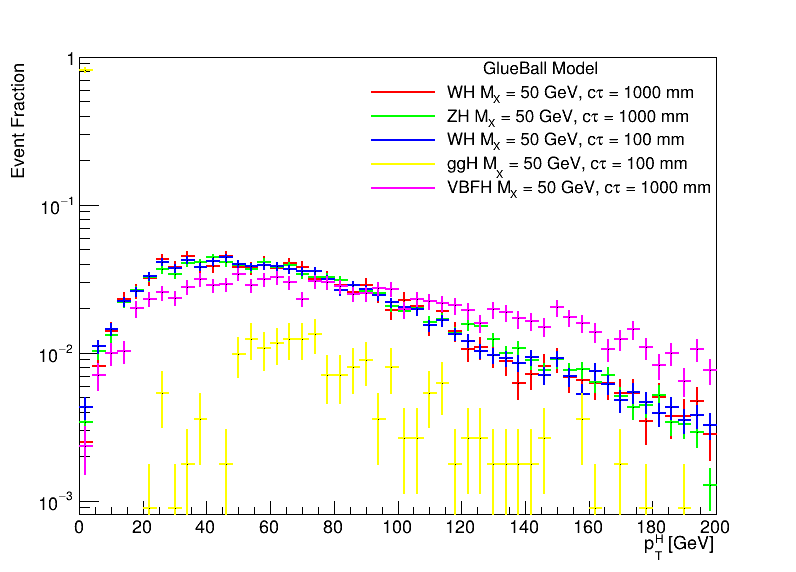

In [143]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5
    sel_h = ten_gen_var['gParticleId'] == 25

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]

    #4-variables for higgs
    h_pt  = ten_gen_var['gParticlePt'][sel_h]
    h_eta = ten_gen_var['gParticleEta'][sel_h]
    h_phi = ten_gen_var['gParticlePhi'][sel_h]
    h_e = ten_gen_var['gParticleE'][sel_h]


    h['h_pt'+str(k)] = create_TH1D(h_pt, axis_title=['p_{T}^{H} [GeV]', 'Event Fraction'], name='', binning=[50,0,200])
    h['h_pt'+str(k)].SetLineColor(cnt+2)
    h['h_pt'+str(k)].SetStats(0)
    #h['h_pt'+str(k)].SetMaximum(10*h['h_pt'+str(k)].GetMaximum())
    h['h_pt'+str(k)].Scale(1/h['h_pt'+str(k)].Integral())
    h['h_pt'+str(k)].SetLineWidth(2)
    h['h_pt'+str(k)].SetMaximum(1)           
    h['h_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['h_pt'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/h_pt_gen.png')



WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/w_pt.png has been created


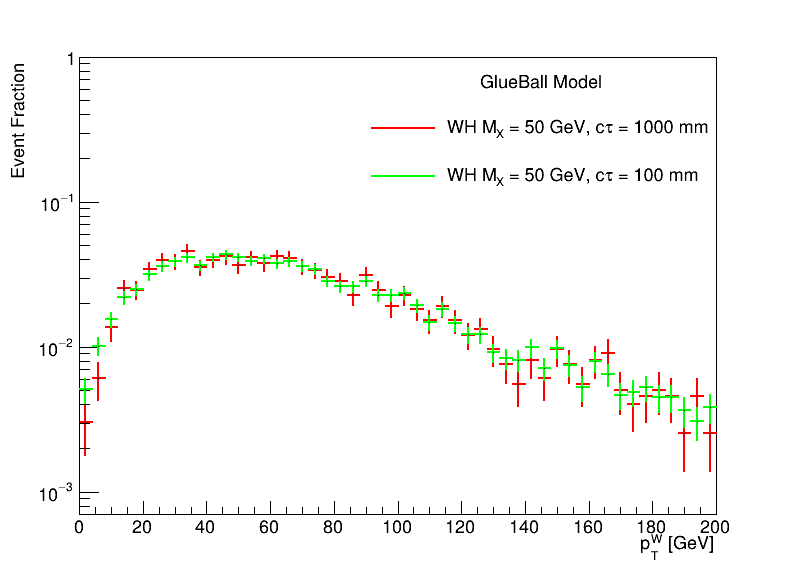

In [144]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


#fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
#fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
#fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5
    sel_h = ten_gen_var['gParticleId'] == 25
    sel_w = ten_gen_var['gParticleId'] == 24
    sel_z = ten_gen_var['gParticleId'] == 23

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]

    #4-variables for higgs
    h_pt  = ten_gen_var['gParticlePt'][sel_h]
    h_eta = ten_gen_var['gParticleEta'][sel_h]
    h_phi = ten_gen_var['gParticlePhi'][sel_h]
    h_e = ten_gen_var['gParticleE'][sel_h]

    #4-variables for W
    w_pt  = ten_gen_var['gParticlePt'][sel_w]
    w_eta = ten_gen_var['gParticleEta'][sel_w]
    w_phi = ten_gen_var['gParticlePhi'][sel_w]
    w_e = ten_gen_var['gParticleE'][sel_w]
    
    #4-variables for Z
    z_pt  = ten_gen_var['gParticlePt'][sel_z]
    z_eta = ten_gen_var['gParticleEta'][sel_z]
    z_phi = ten_gen_var['gParticlePhi'][sel_z]
    z_e = ten_gen_var['gParticleE'][sel_z]

    h['w_pt'+str(k)] = create_TH1D(w_pt, axis_title=['p_{T}^{W} [GeV]', 'Event Fraction'], name='', binning=[50,0,200])
    h['w_pt'+str(k)].SetLineColor(cnt+2)
    h['w_pt'+str(k)].SetStats(0)
    #h['w_pt'+str(k)].SetMaximum(10*h['w_pt'+str(k)].GetMaximum())
    h['w_pt'+str(k)].Scale(1/h['w_pt'+str(k)].Integral())
    h['w_pt'+str(k)].SetLineWidth(2)
    h['w_pt'+str(k)].SetMaximum(1)             
    h['w_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['w_pt'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/w_pt.png')



ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/z_pt.png has been created


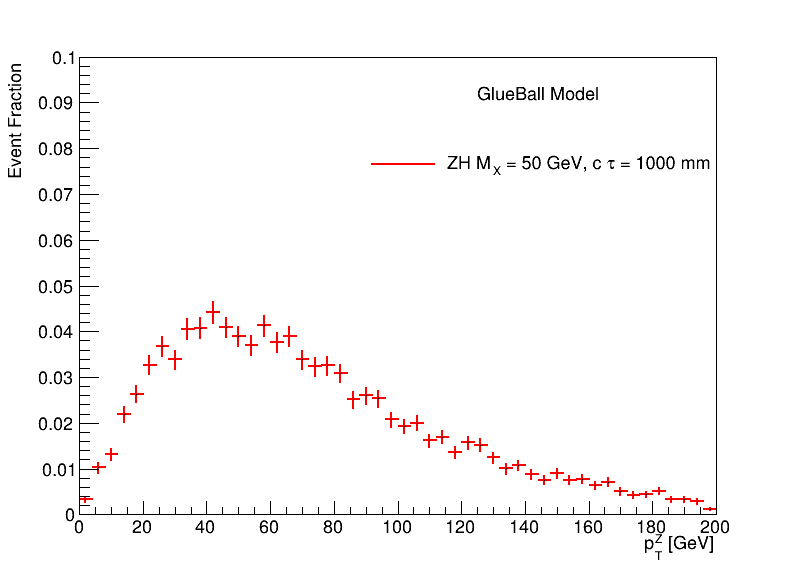

In [146]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


#fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
#fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
#fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
#fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5
    sel_h = ten_gen_var['gParticleId'] == 25
    sel_w = ten_gen_var['gParticleId'] == 24
    sel_z = ten_gen_var['gParticleId'] == 23

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]

    #4-variables for higgs
    h_pt  = ten_gen_var['gParticlePt'][sel_h]
    h_eta = ten_gen_var['gParticleEta'][sel_h]
    h_phi = ten_gen_var['gParticlePhi'][sel_h]
    h_e = ten_gen_var['gParticleE'][sel_h]

    #4-variables for W
    w_pt  = ten_gen_var['gParticlePt'][sel_w]
    w_eta = ten_gen_var['gParticleEta'][sel_w]
    w_phi = ten_gen_var['gParticlePhi'][sel_w]
    w_e = ten_gen_var['gParticleE'][sel_w]
    
    #4-variables for Z
    z_pt  = ten_gen_var['gParticlePt'][sel_z]
    z_eta = ten_gen_var['gParticleEta'][sel_z]
    z_phi = ten_gen_var['gParticlePhi'][sel_z]
    z_e = ten_gen_var['gParticleE'][sel_z]

    h['z_pt'+str(k)] = create_TH1D(z_pt, axis_title=['p_{T}^{Z} [GeV]', 'Event Fraction'], name='', binning=[50,0,200])
    h['z_pt'+str(k)].SetLineColor(cnt+2)
    h['z_pt'+str(k)].SetStats(0)
    #h['z_pt'+str(k)].SetMaximum(10*h['z_pt'+str(k)].GetMaximum())
    h['z_pt'+str(k)].Scale(1/h['z_pt'+str(k)].Integral())
    h['z_pt'+str(k)].SetLineWidth(2)
    h['z_pt'+str(k)].SetMaximum(0.1)             
    h['z_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['z_pt'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
#c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/z_pt.png')



m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/LLP_pt_com.png has been created


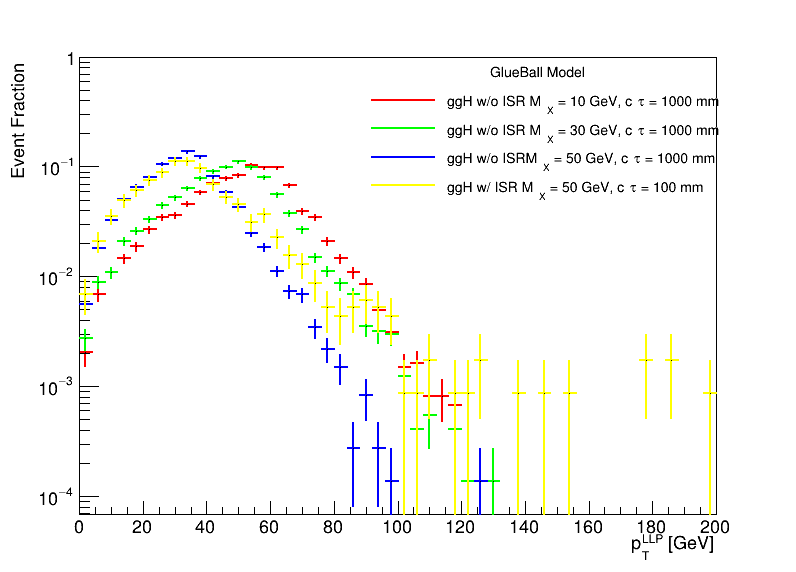

In [147]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}

 
fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH w/ ISR M_{X} = 50 GeV, c#tau = 100 mm'
label['m10ct1000mm'] = 'ggH w/o ISR M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'ggH w/o ISR M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'ggH w/o ISRM_{X} = 50 GeV, c#tau = 1000 mm' 
 

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(min(len(b_pt),len(bhat_pt))):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['llp_pt'+str(k)] = create_TH1D(llp_pt, axis_title=['p_{T}^{LLP} [GeV]', 'Event Fraction'], name='', binning=[50,0,200])
    h['llp_pt'+str(k)].SetLineColor(cnt+2)
    h['llp_pt'+str(k)].SetStats(0)
    #h['llp_pt'+str(k)].SetMaximum(10*h['llp_pt'+str(k)].GetMaximum())
    h['llp_pt'+str(k)].Scale(1/h['llp_pt'+str(k)].Integral())
    h['llp_pt'+str(k)].SetLineWidth(2)
    h['llp_pt'+str(k)].SetMaximum(1)
    h['llp_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['llp_pt'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_pt_com.png')



 
 

m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/b_pt_com.png has been created


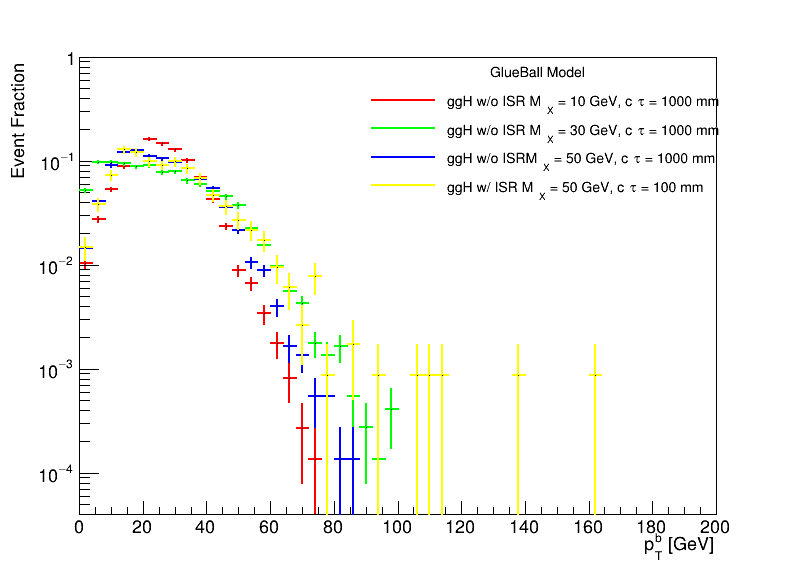

In [148]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH w/ ISR M_{X} = 50 GeV, c#tau = 100 mm'
label['m10ct1000mm'] = 'ggH w/o ISR M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'ggH w/o ISR M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'ggH w/o ISRM_{X} = 50 GeV, c#tau = 1000 mm' 

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    h['b_pt'+str(k)] = create_TH1D(b_pt, axis_title=['p_{T}^{b} [GeV]', 'Event Fraction'], name='', binning=[50,0,200])
    h['b_pt'+str(k)].SetLineColor(cnt+2)
    h['b_pt'+str(k)].SetStats(0)
    #h['b_pt'+str(k)].SetMaximum(10*h['b_pt'+str(k)].GetMaximum())
    h['b_pt'+str(k)].Scale(1/h['b_pt'+str(k)].Integral())
    h['b_pt'+str(k)].SetLineWidth(2)
    h['b_pt'+str(k)].SetMaximum(1)            
    h['b_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['b_pt'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/b_pt_com.png')



m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/bbar_pt_com.png has been created


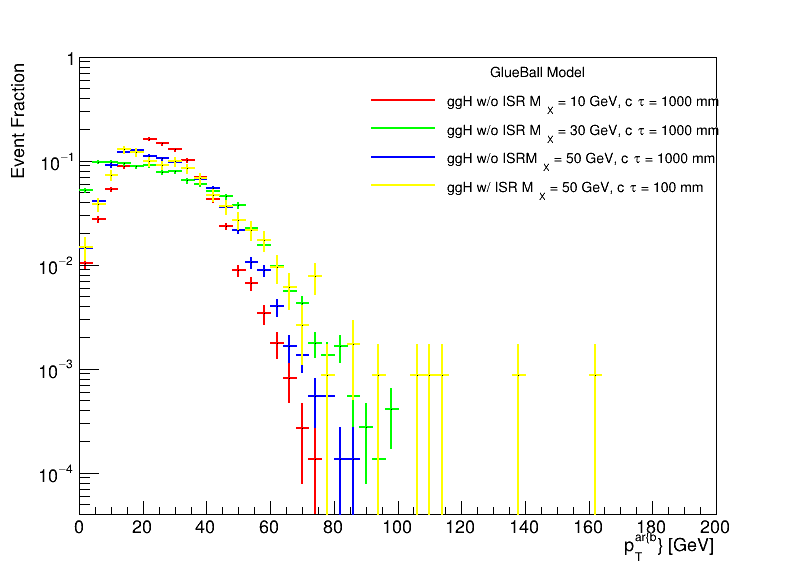

In [150]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH w/ ISR M_{X} = 50 GeV, c#tau = 100 mm'
label['m10ct1000mm'] = 'ggH w/o ISR M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'ggH w/o ISR M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'ggH w/o ISRM_{X} = 50 GeV, c#tau = 1000 mm' 

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    h['bhat_pt'+str(k)] = create_TH1D(b_pt, axis_title=['p_{T}^{\bar{b}} [GeV]', 'Event Fraction'], name='', binning=[50,0,200])
    h['bhat_pt'+str(k)].SetLineColor(cnt+2)
    h['bhat_pt'+str(k)].SetStats(0)
    #h['b_pt'+str(k)].SetMaximum(10*h['b_pt'+str(k)].GetMaximum())
    h['bhat_pt'+str(k)].Scale(1/h['bhat_pt'+str(k)].Integral())
    h['bhat_pt'+str(k)].SetLineWidth(2)
    h['bhat_pt'+str(k)].SetMaximum(1)            
    h['bhat_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['bhat_pt'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/bbar_pt_com.png')



m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/h_pt_com.png has been created


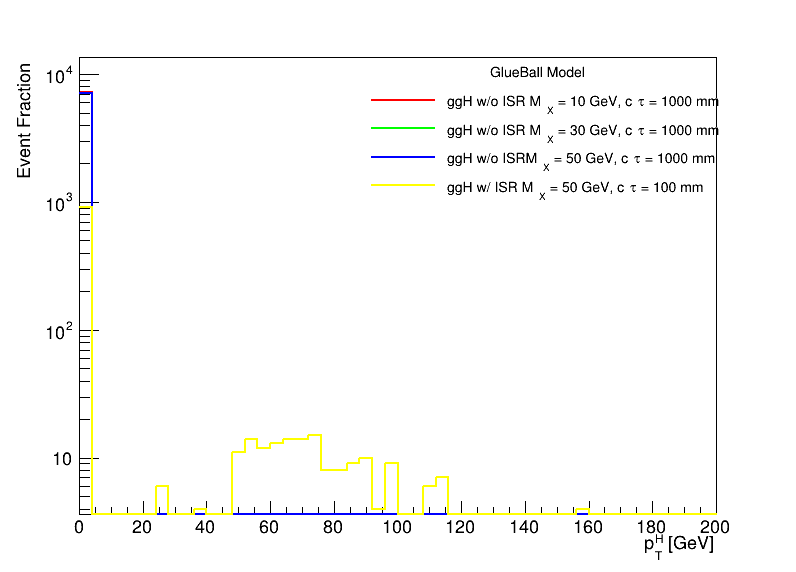

In [155]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH w/ ISR M_{X} = 50 GeV, c#tau = 100 mm'
label['m10ct1000mm'] = 'ggH w/o ISR M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'ggH w/o ISR M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'ggH w/o ISRM_{X} = 50 GeV, c#tau = 1000 mm' 

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5
    sel_h = ten_gen_var['gParticleId'] == 25

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    #4-variables for higgs
    h_pt  = ten_gen_var['gParticlePt'][sel_h]
    h_eta = ten_gen_var['gParticleEta'][sel_h]
    h_phi = ten_gen_var['gParticlePhi'][sel_h]
    h_e = ten_gen_var['gParticleE'][sel_h]


    h['h_pt'+str(k)] = create_TH1D(h_pt, axis_title=['p_{T}^{H} [GeV]', 'Event Fraction'], name='', binning=[50,0,200])
    h['h_pt'+str(k)].SetLineColor(cnt+2)
    h['h_pt'+str(k)].SetStats(0)
    #h['h_pt'+str(k)].SetMaximum(10*h['h_pt'+str(k)].GetMaximum())
    #h['h_pt'+str(k)].Scale(1/h['h_pt'+str(k)].Integral())
    h['h_pt'+str(k)].SetLineWidth(2)
    #h['h_pt'+str(k)].SetMaximum(1)           
    h['h_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['h_pt'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/h_pt_com.png')


 


m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/h_pt_vec.png has been created


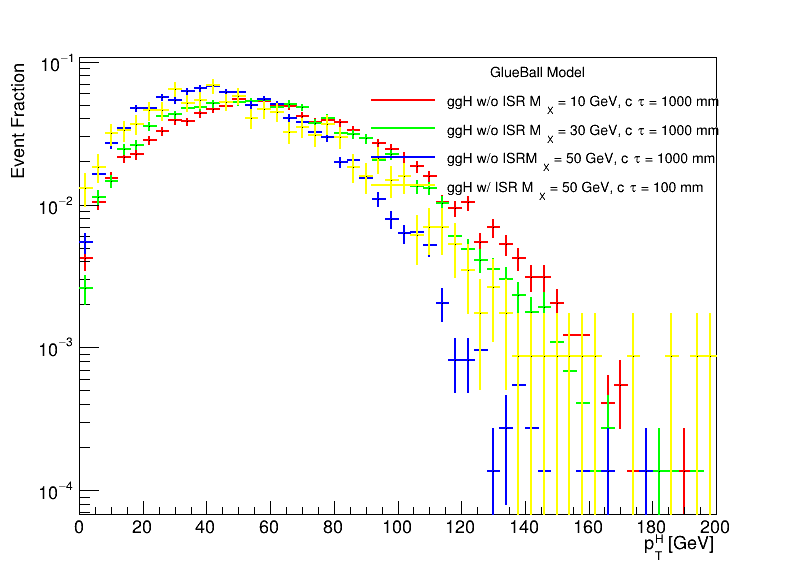

In [28]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}

 
fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH w/ ISR M_{X} = 50 GeV, c#tau = 100 mm'
label['m10ct1000mm'] = 'ggH w/o ISR M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'ggH w/o ISR M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'ggH w/o ISRM_{X} = 50 GeV, c#tau = 1000 mm' 
 

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5
    sel_nu1 = ten_gen_var['gParticleId'] == 12
    sel_nu2 = ten_gen_var['gParticleId'] == -12

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]
    
    #4-variables for electron neurino
    nu1_pt  = ten_gen_var['gParticlePt'][sel_nu1]
    nu1_eta = ten_gen_var['gParticleEta'][sel_nu1]
    nu1_phi = ten_gen_var['gParticlePhi'][sel_nu1]
    nu1_e = ten_gen_var['gParticleE'][sel_nu1]

    #4-variables for anti-electron neurino
    nu2_pt  = ten_gen_var['gParticlePt'][sel_nu2]
    nu2_eta = ten_gen_var['gParticleEta'][sel_nu2]
    nu2_phi = ten_gen_var['gParticlePhi'][sel_nu2]
    nu2_e = ten_gen_var['gParticleE'][sel_nu2]



    #GOTTA get some TLorentz Vectors for the LLPs
    h_p4 = []
    llp1_p4 = []
    b_p4 = []
    bhat_p4 = []
    llp2_p4 = []
    nu1_p4 = []
    nu2_p4 = []
    
    
    for i in range(min(len(b_pt),len(bhat_pt))):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp1_p4.append(tmp_p4_b+tmp_p4_bhat)
        
        tmp_p4_nu1    = rt.TLorentzVector()
        tmp_p4_nu2 = rt.TLorentzVector()
        tmp_p4_nu1.SetPtEtaPhiE(nu1_pt[i],nu1_eta[i],nu1_phi[i], nu1_e[i])
        tmp_p4_nu2.SetPtEtaPhiE(nu2_pt[i],nu2_eta[i],nu2_phi[i], nu2_e[i])
        nu1_p4.append(tmp_p4_nu1)
        nu2_p4.append(tmp_p4_nu2)
        llp2_p4.append(tmp_p4_nu1+tmp_p4_nu2)
        
        h_p4.append(tmp_p4_b+tmp_p4_bhat+tmp_p4_nu1+tmp_p4_nu2)

    llp1_pt  = [x.Pt() for x in llp1_p4]
    llp1_eta = [x.Eta() for x in llp1_p4]
    llp1_phi = [x.Phi() for x in llp1_p4]
    llp1_e   = [x.E() for x in llp1_p4]
    
    llp2_pt  = [x.Pt() for x in llp2_p4]
    llp2_eta = [x.Eta() for x in llp2_p4]
    llp2_phi = [x.Phi() for x in llp2_p4]
    llp2_e   = [x.E() for x in llp2_p4]
    
    h_pt  = [x.Pt() for x in h_p4]
    h_eta = [x.Eta() for x in h_p4]
    h_phi = [x.Phi() for x in h_p4]
    h_e   = [x.E() for x in h_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['h_pt'+str(k)] = create_TH1D(h_pt, axis_title=['p_{T}^{H} [GeV]', 'Event Fraction'], name='', binning=[50,0,200])
    h['h_pt'+str(k)].SetLineColor(cnt+2)
    h['h_pt'+str(k)].SetStats(0)
    #h['h_pt'+str(k)].SetMaximum(10*h['h_pt'+str(k)].GetMaximum())
    h['h_pt'+str(k)].Scale(1/h['h_pt'+str(k)].Integral())
    h['h_pt'+str(k)].SetLineWidth(2)
    #h['h_pt'+str(k)].SetMaximum(1)           
    h['h_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['h_pt'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/h_pt_vec.png')



 
 

WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
4973
220
1177
177
348
163
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 1
12492
579
3000
513
871
444


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/mu_from_w_pt.png has been created


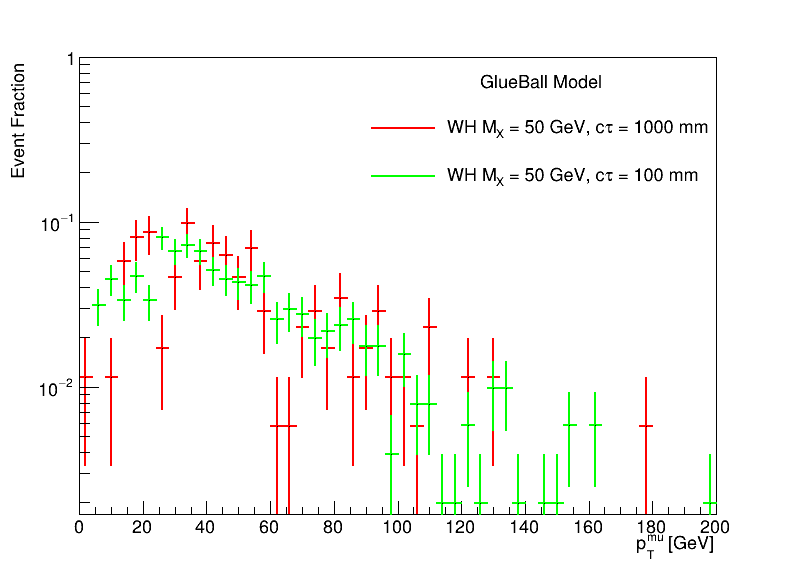

In [13]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}

 
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
#fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'
 

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=1000

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticleMotherId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_d = ten_gen_var['gParticleId'] == 1
    sel_u = ten_gen_var['gParticleId'] == 2
    sel_s = ten_gen_var['gParticleId'] == 3
    sel_c = ten_gen_var['gParticleId'] == 4
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_t = ten_gen_var['gParticleId'] == 6
    
    sel_dhat = ten_gen_var['gParticleId'] == -1
    sel_uhat = ten_gen_var['gParticleId'] == -2
    sel_shat = ten_gen_var['gParticleId'] == -3
    sel_chat = ten_gen_var['gParticleId'] == -4
    sel_bhat = ten_gen_var['gParticleId'] == -5
    sel_that = ten_gen_var['gParticleId'] == -6
    
    sel_q = np.logical_or(sel_d, np.logical_or(sel_u, np.logical_or(sel_s, np.logical_or(sel_c, np.logical_or(sel_b, sel_t )))))
    sel_qhat = np.logical_or(sel_dhat, np.logical_or(sel_uhat, np.logical_or(sel_shat, np.logical_or(sel_chat, sel_bhat, sel_that ))))
    
    sel_nu1 = ten_gen_var['gParticleId'] == 12
    sel_nu2 = ten_gen_var['gParticleId'] == -12
    
    sel_e = ten_gen_var['gParticleId'] == 11
    #print sel_e
    sel_nue = ten_gen_var['gParticleId'] == 12
    sel_mu = ten_gen_var['gParticleId'] == 13
    #print sel_mu
    sel_numu = ten_gen_var['gParticleId'] == 14
    sel_tau = ten_gen_var['gParticleId'] == 15
    sel_nutau = ten_gen_var['gParticleId'] == 16
    
    sel_ehat = ten_gen_var['gParticleId'] == -11
    sel_nuehat = ten_gen_var['gParticleId'] == -12
    sel_muhat = ten_gen_var['gParticleId'] == -13
    sel_numuhat = ten_gen_var['gParticleId'] == -14
    sel_tauhat = ten_gen_var['gParticleId'] == -15
    sel_nutauhat = ten_gen_var['gParticleId'] == -16
    
    #-24 w-, 24 w+
    sel_w = ten_gen_var['gParticleId'] == -24
    sel_what = ten_gen_var['gParticleId'] == 24
    sel_z = ten_gen_var['gParticleId'] == 23
    sel_zhat = ten_gen_var['gParticleId'] == -23
    
    sel_from_w = ten_gen_var['gParticleMotherId'] == -24
    sel_from_what = ten_gen_var['gParticleMotherId'] == 24
    sel_from_z = ten_gen_var['gParticleMotherId'] == 23
    sel_from_zhat = ten_gen_var['gParticleMotherId'] == -23
    
    #w- decays to lepton and neutrino
    
    sel_e_from_w = np.logical_and(sel_from_w , sel_e)
    #print sel_e_from_w
    sel_nue_from_w = np.logical_and(sel_from_w , sel_nue)
    sel_mu_from_w = np.logical_and(sel_from_w , sel_mu)
    #print sel_mu_from_w
    sel_numu_from_w = np.logical_and(sel_from_w  , sel_numu)
    sel_tau_from_w = np.logical_and(sel_from_w  , sel_tau)
    sel_nutau_from_w = np.logical_and(sel_from_w  , sel_nutau)
    
    #w- decays to hadrons
    

    sel_q_from_w = np.logical_and(sel_from_w,sel_q)
    sel_qhat_from_w = np.logical_and(sel_from_w,sel_qhat)
    
    #w+ decay
    sel_ehat_from_what = np.logical_and(sel_from_what , sel_ehat)
    sel_nuehat_from_what = np.logical_and(sel_from_what , sel_nuehat)
    sel_muhat_from_what = np.logical_and(sel_from_what , sel_muhat)
    sel_numuhat_from_what = np.logical_and(sel_from_what , sel_numuhat)
    sel_tauhat_from_what = np.logical_and(sel_from_what , sel_tauhat)
    sel_nutauhat_from_what = np.logical_and(sel_from_what , sel_nutauhat)
    
    #w+ decays to hadrons
    
 
    sel_q_from_what = np.logical_and(sel_from_what, sel_q)
    sel_qhat_from_what = np.logical_and(sel_from_what, sel_qhat)
    
    #z decays to leptons  
    
    sel_e_from_z = np.logical_and(sel_from_z , sel_e)
    sel_ehat_from_z = np.logical_and(sel_from_z , sel_ehat)
    sel_mu_from_z = np.logical_and(sel_from_z , sel_mu)
    sel_muhat_from_z = np.logical_and(sel_from_z , sel_muhat)
    sel_tau_from_z = np.logical_and(sel_from_z , sel_tau)
    sel_tauhat_from_z = np.logical_and(sel_from_z , sel_tauhat)
    
    #z decays to hadrons
    
 
    sel_q_from_z = np.logical_and(sel_from_z, sel_q)
    sel_qhat_from_z = np.logical_and(sel_from_z, sel_qhat)
    
    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]
    
    t_pt  = ten_gen_var['gParticlePt'][sel_t]
    t_eta = ten_gen_var['gParticleEta'][sel_t]
    t_phi = ten_gen_var['gParticlePhi'][sel_t]
    t_e = ten_gen_var['gParticleE'][sel_t]


    that_pt  = ten_gen_var['gParticlePt'][sel_that]
    that_eta = ten_gen_var['gParticleEta'][sel_that]
    that_phi = ten_gen_var['gParticlePhi'][sel_that]
    that_e = ten_gen_var['gParticleE'][sel_that]

    c_pt  = ten_gen_var['gParticlePt'][sel_c]
    c_eta = ten_gen_var['gParticleEta'][sel_c]
    c_phi = ten_gen_var['gParticlePhi'][sel_c]
    c_e = ten_gen_var['gParticleE'][sel_c]


    chat_pt  = ten_gen_var['gParticlePt'][sel_chat]
    chat_eta = ten_gen_var['gParticleEta'][sel_chat]
    chat_phi = ten_gen_var['gParticlePhi'][sel_chat]
    chat_e = ten_gen_var['gParticleE'][sel_chat]

    s_pt  = ten_gen_var['gParticlePt'][sel_s]
    s_eta = ten_gen_var['gParticleEta'][sel_s]
    s_phi = ten_gen_var['gParticlePhi'][sel_s]
    s_e = ten_gen_var['gParticleE'][sel_s]


    shat_pt  = ten_gen_var['gParticlePt'][sel_shat]
    shat_eta = ten_gen_var['gParticleEta'][sel_shat]
    shat_phi = ten_gen_var['gParticlePhi'][sel_shat]
    shat_e = ten_gen_var['gParticleE'][sel_shat]

    u_pt  = ten_gen_var['gParticlePt'][sel_u]
    u_eta = ten_gen_var['gParticleEta'][sel_u]
    u_phi = ten_gen_var['gParticlePhi'][sel_u]
    u_e = ten_gen_var['gParticleE'][sel_u]


    uhat_pt  = ten_gen_var['gParticlePt'][sel_uhat]
    uhat_eta = ten_gen_var['gParticleEta'][sel_uhat]
    uhat_phi = ten_gen_var['gParticlePhi'][sel_uhat]
    uhat_e = ten_gen_var['gParticleE'][sel_uhat]

    d_pt  = ten_gen_var['gParticlePt'][sel_d]
    d_eta = ten_gen_var['gParticleEta'][sel_d]
    d_phi = ten_gen_var['gParticlePhi'][sel_d]
    d_e = ten_gen_var['gParticleE'][sel_d]


    dhat_pt  = ten_gen_var['gParticlePt'][sel_dhat]
    dhat_eta = ten_gen_var['gParticleEta'][sel_dhat]
    dhat_phi = ten_gen_var['gParticlePhi'][sel_dhat]
    dhat_e = ten_gen_var['gParticleE'][sel_dhat]

    
    #4-variables for electron neurino
    nu1_pt  = ten_gen_var['gParticlePt'][sel_nu1]
    nu1_eta = ten_gen_var['gParticleEta'][sel_nu1]
    nu1_phi = ten_gen_var['gParticlePhi'][sel_nu1]
    nu1_e = ten_gen_var['gParticleE'][sel_nu1]

    #4-variables for anti-electron neurino
    nu2_pt  = ten_gen_var['gParticlePt'][sel_nu2]
    nu2_eta = ten_gen_var['gParticleEta'][sel_nu2]
    nu2_phi = ten_gen_var['gParticlePhi'][sel_nu2]
    nu2_e = ten_gen_var['gParticleE'][sel_nu2]

    #4-variables for electron
    e_pt  = ten_gen_var['gParticlePt'][sel_e]
    e_eta = ten_gen_var['gParticleEta'][sel_e]
    e_phi = ten_gen_var['gParticlePhi'][sel_e]
    e_e = ten_gen_var['gParticleE'][sel_e]

    #4-variables for muon
    mu_pt  = ten_gen_var['gParticlePt'][sel_mu]
    mu_eta = ten_gen_var['gParticleEta'][sel_mu]
    mu_phi = ten_gen_var['gParticlePhi'][sel_mu]
    mu_e = ten_gen_var['gParticleE'][sel_mu]
    
    #4-variables for tau
    tau_pt  = ten_gen_var['gParticlePt'][sel_tau]
    tau_eta = ten_gen_var['gParticleEta'][sel_tau]
    tau_phi = ten_gen_var['gParticlePhi'][sel_tau]
    tau_e = ten_gen_var['gParticleE'][sel_tau]
    
    #4-variables for positron
    ehat_pt  = ten_gen_var['gParticlePt'][sel_ehat]
    ehat_eta = ten_gen_var['gParticleEta'][sel_ehat]
    ehat_phi = ten_gen_var['gParticlePhi'][sel_ehat]
    ehat_e = ten_gen_var['gParticleE'][sel_ehat]

    #4-variables for mu+
    muhat_pt  = ten_gen_var['gParticlePt'][sel_muhat]
    muhat_eta = ten_gen_var['gParticleEta'][sel_muhat]
    muhat_phi = ten_gen_var['gParticlePhi'][sel_muhat]
    muhat_e = ten_gen_var['gParticleE'][sel_muhat]
    
    #4-variables for tau+
    tauhat_pt  = ten_gen_var['gParticlePt'][sel_tauhat]
    tauhat_eta = ten_gen_var['gParticleEta'][sel_tauhat]
    tauhat_phi = ten_gen_var['gParticlePhi'][sel_tauhat]
    tauhat_e = ten_gen_var['gParticleE'][sel_tauhat]
    
    #4-variables for electron neutrino
    nue_pt  = ten_gen_var['gParticlePt'][sel_nue]
    nue_eta = ten_gen_var['gParticleEta'][sel_nue]
    nue_phi = ten_gen_var['gParticlePhi'][sel_nue]
    nue_e = ten_gen_var['gParticleE'][sel_nue]

    #4-variables for muon neutrino
    numu_pt  = ten_gen_var['gParticlePt'][sel_numu]
    numu_eta = ten_gen_var['gParticleEta'][sel_numu]
    numu_phi = ten_gen_var['gParticlePhi'][sel_numu]
    numu_e = ten_gen_var['gParticleE'][sel_numu]
    
    #4-variables for tau neutrino
    nutau_pt  = ten_gen_var['gParticlePt'][sel_nutau]
    nutau_eta = ten_gen_var['gParticleEta'][sel_nutau]
    nutau_phi = ten_gen_var['gParticlePhi'][sel_nutau]
    nutau_e = ten_gen_var['gParticleE'][sel_nutau]
    
    #4-variables for anti-electron neutrino
    nuehat_pt  = ten_gen_var['gParticlePt'][sel_nuehat]
    nuehat_eta = ten_gen_var['gParticleEta'][sel_nuehat]
    nuehat_phi = ten_gen_var['gParticlePhi'][sel_nuehat]
    nuehat_e = ten_gen_var['gParticleE'][sel_nuehat]

    #4-variables for anti muon neutrino
    numuhat_pt  = ten_gen_var['gParticlePt'][sel_numuhat]
    numuhat_eta = ten_gen_var['gParticleEta'][sel_numuhat]
    numuhat_phi = ten_gen_var['gParticlePhi'][sel_numuhat]
    numuhat_e = ten_gen_var['gParticleE'][sel_numuhat]
    
    #4-variables for anti tau neutrino
    nutauhat_pt  = ten_gen_var['gParticlePt'][sel_nutauhat]
    nutauhat_eta = ten_gen_var['gParticleEta'][sel_nutauhat]
    nutauhat_phi = ten_gen_var['gParticlePhi'][sel_nutauhat]
    nutauhat_e = ten_gen_var['gParticleE'][sel_nutauhat]
    
    #4-variables for muon from w
    mu_from_w_pt  = ten_gen_var['gParticlePt'][sel_mu_from_w]
    mu_from_w_eta = ten_gen_var['gParticleEta'][sel_mu_from_w]
    mu_from_w_phi = ten_gen_var['gParticlePhi'][sel_mu_from_w]
    mu_from_w_e = ten_gen_var['gParticleE'][sel_mu_from_w]
    
    #4-variables for e from w
    e_from_w_pt  = ten_gen_var['gParticlePt'][sel_e_from_w]
    e_from_w_eta = ten_gen_var['gParticleEta'][sel_e_from_w]
    e_from_w_phi = ten_gen_var['gParticlePhi'][sel_e_from_w]
    e_from_w_e = ten_gen_var['gParticleE'][sel_e_from_w]
    
    #4-variables for tau from w
    tau_from_w_pt  = ten_gen_var['gParticlePt'][sel_tau_from_w]
    tau_from_w_eta = ten_gen_var['gParticleEta'][sel_tau_from_w]
    tau_from_w_phi = ten_gen_var['gParticlePhi'][sel_tau_from_w]
    tau_from_w_e = ten_gen_var['gParticleE'][sel_tau_from_w]
    

            
    #ratio of different lepton channel
    #e_mu_ratio = float(len(e_from_w_pt)/float(len(mu_from_w_pt))
    #print e_mu_ratio
    print len(e_pt)
    print len(e_from_w_pt)
    print len(mu_pt)
    print len(mu_from_w_pt)
    print len(tau_pt)
    print len(tau_from_w_pt)
    
 
 
    h['mu_from_w_pt'+str(k)] = create_TH1D(mu_from_w_pt, axis_title=['p_{T}^{mu} [GeV]', 'Event Fraction'], name='', binning=[50,0,200])
    h['mu_from_w_pt'+str(k)].SetLineColor(cnt+2)
    h['mu_from_w_pt'+str(k)].SetStats(0)
    #h['b_pt'+str(k)].SetMaximum(10*h['b_pt'+str(k)].GetMaximum())
    h['mu_from_w_pt'+str(k)].Scale(1/h['mu_from_w_pt'+str(k)].Integral())
    h['mu_from_w_pt'+str(k)].SetLineWidth(2)
    h['mu_from_w_pt'+str(k)].SetMaximum(1)            
    h['mu_from_w_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['mu_from_w_pt'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/mu_from_w_pt.png')


 
 

In [39]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}

 
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
#fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'
 

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=1000

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticleMotherId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_d = ten_gen_var['gParticleId'] == 1
    sel_u = ten_gen_var['gParticleId'] == 2
    sel_s = ten_gen_var['gParticleId'] == 3
    sel_c = ten_gen_var['gParticleId'] == 4
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_t = ten_gen_var['gParticleId'] == 6
    
    sel_dhat = ten_gen_var['gParticleId'] == -1
    sel_uhat = ten_gen_var['gParticleId'] == -2
    sel_shat = ten_gen_var['gParticleId'] == -3
    sel_chat = ten_gen_var['gParticleId'] == -4
    sel_bhat = ten_gen_var['gParticleId'] == -5
    sel_that = ten_gen_var['gParticleId'] == -6
    
    sel_q = np.logical_or(sel_d, np.logical_or(sel_u, np.logical_or(sel_s, np.logical_or(sel_c, np.logical_or(sel_b, sel_t )))))
    sel_qhat = np.logical_or(sel_dhat, np.logical_or(sel_uhat, np.logical_or(sel_shat, np.logical_or(sel_chat, sel_bhat, sel_that ))))
    
    sel_nu1 = ten_gen_var['gParticleId'] == 12
    sel_nu2 = ten_gen_var['gParticleId'] == -12
    
    sel_e = ten_gen_var['gParticleId'] == 11
    #print sel_e
    sel_nue = ten_gen_var['gParticleId'] == -12
    sel_mu = ten_gen_var['gParticleId'] == 13
    #print sel_mu
    sel_numu = ten_gen_var['gParticleId'] == -14
    sel_tau = ten_gen_var['gParticleId'] == 15
    sel_nutau = ten_gen_var['gParticleId'] == -16
    
    sel_ehat = ten_gen_var['gParticleId'] == -11
    sel_nuehat = ten_gen_var['gParticleId'] == 12
    sel_muhat = ten_gen_var['gParticleId'] == -13
    sel_numuhat = ten_gen_var['gParticleId'] == 14
    sel_tauhat = ten_gen_var['gParticleId'] == -15
    sel_nutauhat = ten_gen_var['gParticleId'] == 16
    
    #-24 w-, 24 w+
    sel_w = ten_gen_var['gParticleId'] == -24
    sel_what = ten_gen_var['gParticleId'] == 24
    sel_z = ten_gen_var['gParticleId'] == 23
    sel_zhat = ten_gen_var['gParticleId'] == -23
    
    sel_from_w = ten_gen_var['gParticleMotherId'] == -24
    sel_from_what = ten_gen_var['gParticleMotherId'] == 24
    sel_from_z = ten_gen_var['gParticleMotherId'] == 23
    sel_from_zhat = ten_gen_var['gParticleMotherId'] == -23
    
    #w- decays to lepton and neutrino
    
    sel_e_from_w = np.logical_and(sel_from_w , sel_e)
    #print sel_e_from_w
    sel_nue_from_w = np.logical_and(sel_from_w , sel_nue)
    #print sel_nue_from_w
    sel_mu_from_w = np.logical_and(sel_from_w , sel_mu)
    #print sel_mu_from_w
    sel_numu_from_w = np.logical_and(sel_from_w  , sel_numu)
    sel_tau_from_w = np.logical_and(sel_from_w  , sel_tau)
    sel_nutau_from_w = np.logical_and(sel_from_w  , sel_nutau)
    
    #w- decays to hadrons
    
    sel_u_from_w = np.logical_and(sel_from_w,sel_u)
    sel_d_from_w = np.logical_and(sel_from_w,sel_d)
    sel_c_from_w = np.logical_and(sel_from_w,sel_c)
    sel_s_from_w = np.logical_and(sel_from_w,sel_s)
    sel_t_from_w = np.logical_and(sel_from_w,sel_t)
    sel_b_from_w = np.logical_and(sel_from_w,sel_b)
    
    sel_uhat_from_w = np.logical_and(sel_from_w,sel_uhat)
    sel_dhat_from_w = np.logical_and(sel_from_w,sel_dhat)
    sel_chat_from_w = np.logical_and(sel_from_w,sel_chat)
    sel_shat_from_w = np.logical_and(sel_from_w,sel_shat)
    sel_that_from_w = np.logical_and(sel_from_w,sel_that)
    sel_bhat_from_w = np.logical_and(sel_from_w,sel_bhat)

    sel_q_from_w = np.logical_and(sel_from_w,sel_q)
    sel_qhat_from_w = np.logical_and(sel_from_w,sel_qhat)
    
    #w+ decay
    sel_ehat_from_what = np.logical_and(sel_from_what , sel_ehat)
    sel_nuehat_from_what = np.logical_and(sel_from_what , sel_nuehat)
    sel_muhat_from_what = np.logical_and(sel_from_what , sel_muhat)
    sel_numuhat_from_what = np.logical_and(sel_from_what , sel_numuhat)
    sel_tauhat_from_what = np.logical_and(sel_from_what , sel_tauhat)
    sel_nutauhat_from_what = np.logical_and(sel_from_what , sel_nutauhat)
    
    #w+ decays to hadrons
        
    sel_u_from_what = np.logical_and(sel_from_what,sel_u)
    sel_d_from_what = np.logical_and(sel_from_what,sel_d)
    sel_c_from_what = np.logical_and(sel_from_what,sel_c)
    sel_s_from_what = np.logical_and(sel_from_what,sel_s)
    sel_t_from_what = np.logical_and(sel_from_what,sel_t)
    sel_b_from_what = np.logical_and(sel_from_what,sel_b)
    
    sel_uhat_from_what = np.logical_and(sel_from_what,sel_uhat)
    sel_dhat_from_what = np.logical_and(sel_from_what,sel_dhat)
    sel_chat_from_what = np.logical_and(sel_from_what,sel_chat)
    sel_shat_from_what = np.logical_and(sel_from_what,sel_shat)
    sel_that_from_what = np.logical_and(sel_from_what,sel_that)
    sel_bhat_from_what = np.logical_and(sel_from_what,sel_bhat)

    sel_q_from_what = np.logical_and(sel_from_what, sel_q)
    sel_qhat_from_what = np.logical_and(sel_from_what, sel_qhat)
    
    #z decays to leptons  
    
    sel_e_from_z = np.logical_and(sel_from_z , sel_e)
    sel_ehat_from_z = np.logical_and(sel_from_z , sel_ehat)
    sel_mu_from_z = np.logical_and(sel_from_z , sel_mu)
    sel_muhat_from_z = np.logical_and(sel_from_z , sel_muhat)
    sel_tau_from_z = np.logical_and(sel_from_z , sel_tau)
    sel_tauhat_from_z = np.logical_and(sel_from_z , sel_tauhat)
    
    #z decays to hadrons
 
    sel_q_from_z = np.logical_and(sel_from_z, sel_q)
    sel_qhat_from_z = np.logical_and(sel_from_z, sel_qhat)
    
    #4-variables for quarks and anti-quarks
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


     
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]
    
    t_pt  = ten_gen_var['gParticlePt'][sel_t]
    t_eta = ten_gen_var['gParticleEta'][sel_t]
    t_phi = ten_gen_var['gParticlePhi'][sel_t]
    t_e = ten_gen_var['gParticleE'][sel_t]


    that_pt  = ten_gen_var['gParticlePt'][sel_that]
    that_eta = ten_gen_var['gParticleEta'][sel_that]
    that_phi = ten_gen_var['gParticlePhi'][sel_that]
    that_e = ten_gen_var['gParticleE'][sel_that]

    c_pt  = ten_gen_var['gParticlePt'][sel_c]
    c_eta = ten_gen_var['gParticleEta'][sel_c]
    c_phi = ten_gen_var['gParticlePhi'][sel_c]
    c_e = ten_gen_var['gParticleE'][sel_c]


    chat_pt  = ten_gen_var['gParticlePt'][sel_chat]
    chat_eta = ten_gen_var['gParticleEta'][sel_chat]
    chat_phi = ten_gen_var['gParticlePhi'][sel_chat]
    chat_e = ten_gen_var['gParticleE'][sel_chat]

    s_pt  = ten_gen_var['gParticlePt'][sel_s]
    s_eta = ten_gen_var['gParticleEta'][sel_s]
    s_phi = ten_gen_var['gParticlePhi'][sel_s]
    s_e = ten_gen_var['gParticleE'][sel_s]


    shat_pt  = ten_gen_var['gParticlePt'][sel_shat]
    shat_eta = ten_gen_var['gParticleEta'][sel_shat]
    shat_phi = ten_gen_var['gParticlePhi'][sel_shat]
    shat_e = ten_gen_var['gParticleE'][sel_shat]

    u_pt  = ten_gen_var['gParticlePt'][sel_u]
    u_eta = ten_gen_var['gParticleEta'][sel_u]
    u_phi = ten_gen_var['gParticlePhi'][sel_u]
    u_e = ten_gen_var['gParticleE'][sel_u]


    uhat_pt  = ten_gen_var['gParticlePt'][sel_uhat]
    uhat_eta = ten_gen_var['gParticleEta'][sel_uhat]
    uhat_phi = ten_gen_var['gParticlePhi'][sel_uhat]
    uhat_e = ten_gen_var['gParticleE'][sel_uhat]

    d_pt  = ten_gen_var['gParticlePt'][sel_d]
    d_eta = ten_gen_var['gParticleEta'][sel_d]
    d_phi = ten_gen_var['gParticlePhi'][sel_d]
    d_e = ten_gen_var['gParticleE'][sel_d]


    dhat_pt  = ten_gen_var['gParticlePt'][sel_dhat]
    dhat_eta = ten_gen_var['gParticleEta'][sel_dhat]
    dhat_phi = ten_gen_var['gParticlePhi'][sel_dhat]
    dhat_e = ten_gen_var['gParticleE'][sel_dhat]

    
    #4-variables for electron neurino
    nu1_pt  = ten_gen_var['gParticlePt'][sel_nu1]
    nu1_eta = ten_gen_var['gParticleEta'][sel_nu1]
    nu1_phi = ten_gen_var['gParticlePhi'][sel_nu1]
    nu1_e = ten_gen_var['gParticleE'][sel_nu1]

    #4-variables for anti-electron neurino
    nu2_pt  = ten_gen_var['gParticlePt'][sel_nu2]
    nu2_eta = ten_gen_var['gParticleEta'][sel_nu2]
    nu2_phi = ten_gen_var['gParticlePhi'][sel_nu2]
    nu2_e = ten_gen_var['gParticleE'][sel_nu2]

    #4-variables for electron
    e_pt  = ten_gen_var['gParticlePt'][sel_e]
    e_eta = ten_gen_var['gParticleEta'][sel_e]
    e_phi = ten_gen_var['gParticlePhi'][sel_e]
    e_e = ten_gen_var['gParticleE'][sel_e]

    #4-variables for muon
    mu_pt  = ten_gen_var['gParticlePt'][sel_mu]
    mu_eta = ten_gen_var['gParticleEta'][sel_mu]
    mu_phi = ten_gen_var['gParticlePhi'][sel_mu]
    mu_e = ten_gen_var['gParticleE'][sel_mu]
    
    #4-variables for tau
    tau_pt  = ten_gen_var['gParticlePt'][sel_tau]
    tau_eta = ten_gen_var['gParticleEta'][sel_tau]
    tau_phi = ten_gen_var['gParticlePhi'][sel_tau]
    tau_e = ten_gen_var['gParticleE'][sel_tau]
    
    #4-variables for positron
    ehat_pt  = ten_gen_var['gParticlePt'][sel_ehat]
    ehat_eta = ten_gen_var['gParticleEta'][sel_ehat]
    ehat_phi = ten_gen_var['gParticlePhi'][sel_ehat]
    ehat_e = ten_gen_var['gParticleE'][sel_ehat]

    #4-variables for mu+
    muhat_pt  = ten_gen_var['gParticlePt'][sel_muhat]
    muhat_eta = ten_gen_var['gParticleEta'][sel_muhat]
    muhat_phi = ten_gen_var['gParticlePhi'][sel_muhat]
    muhat_e = ten_gen_var['gParticleE'][sel_muhat]
    
    #4-variables for tau+
    tauhat_pt  = ten_gen_var['gParticlePt'][sel_tauhat]
    tauhat_eta = ten_gen_var['gParticleEta'][sel_tauhat]
    tauhat_phi = ten_gen_var['gParticlePhi'][sel_tauhat]
    tauhat_e = ten_gen_var['gParticleE'][sel_tauhat]
    
    #4-variables for electron neutrino
    nue_pt  = ten_gen_var['gParticlePt'][sel_nue]
    nue_eta = ten_gen_var['gParticleEta'][sel_nue]
    nue_phi = ten_gen_var['gParticlePhi'][sel_nue]
    nue_e = ten_gen_var['gParticleE'][sel_nue]

    #4-variables for muon neutrino
    numu_pt  = ten_gen_var['gParticlePt'][sel_numu]
    numu_eta = ten_gen_var['gParticleEta'][sel_numu]
    numu_phi = ten_gen_var['gParticlePhi'][sel_numu]
    numu_e = ten_gen_var['gParticleE'][sel_numu]
    
    #4-variables for tau neutrino
    nutau_pt  = ten_gen_var['gParticlePt'][sel_nutau]
    nutau_eta = ten_gen_var['gParticleEta'][sel_nutau]
    nutau_phi = ten_gen_var['gParticlePhi'][sel_nutau]
    nutau_e = ten_gen_var['gParticleE'][sel_nutau]
    
    #4-variables for anti-electron neutrino
    nuehat_pt  = ten_gen_var['gParticlePt'][sel_nuehat]
    nuehat_eta = ten_gen_var['gParticleEta'][sel_nuehat]
    nuehat_phi = ten_gen_var['gParticlePhi'][sel_nuehat]
    nuehat_e = ten_gen_var['gParticleE'][sel_nuehat]

    #4-variables for anti muon neutrino
    numuhat_pt  = ten_gen_var['gParticlePt'][sel_numuhat]
    numuhat_eta = ten_gen_var['gParticleEta'][sel_numuhat]
    numuhat_phi = ten_gen_var['gParticlePhi'][sel_numuhat]
    numuhat_e = ten_gen_var['gParticleE'][sel_numuhat]
    
    #4-variables for anti tau neutrino
    nutauhat_pt  = ten_gen_var['gParticlePt'][sel_nutauhat]
    nutauhat_eta = ten_gen_var['gParticleEta'][sel_nutauhat]
    nutauhat_phi = ten_gen_var['gParticlePhi'][sel_nutauhat]
    nutauhat_e = ten_gen_var['gParticleE'][sel_nutauhat]
    
    #4-variables for muon from w
    mu_from_w_pt  = ten_gen_var['gParticlePt'][sel_mu_from_w]
    mu_from_w_eta = ten_gen_var['gParticleEta'][sel_mu_from_w]
    mu_from_w_phi = ten_gen_var['gParticlePhi'][sel_mu_from_w]
    mu_from_w_e = ten_gen_var['gParticleE'][sel_mu_from_w]
    
    #4-variables for e from w
    e_from_w_pt  = ten_gen_var['gParticlePt'][sel_e_from_w]
    e_from_w_eta = ten_gen_var['gParticleEta'][sel_e_from_w]
    e_from_w_phi = ten_gen_var['gParticlePhi'][sel_e_from_w]
    e_from_w_e = ten_gen_var['gParticleE'][sel_e_from_w]
    
    #4-variables for tau from w
    tau_from_w_pt  = ten_gen_var['gParticlePt'][sel_tau_from_w]
    tau_from_w_eta = ten_gen_var['gParticleEta'][sel_tau_from_w]
    tau_from_w_phi = ten_gen_var['gParticlePhi'][sel_tau_from_w]
    tau_from_w_e = ten_gen_var['gParticleE'][sel_tau_from_w]
    
        
    #4-variables for muon neutrino from w
    numu_from_w_pt  = ten_gen_var['gParticlePt'][sel_numu_from_w]
    numu_from_w_eta = ten_gen_var['gParticleEta'][sel_numu_from_w]
    numu_from_w_phi = ten_gen_var['gParticlePhi'][sel_numu_from_w]
    numu_from_w_e = ten_gen_var['gParticleE'][sel_numu_from_w]
    
    #4-variables for e neutrino from w
    nue_from_w_pt  = ten_gen_var['gParticlePt'][sel_nue_from_w]
    nue_from_w_eta = ten_gen_var['gParticleEta'][sel_nue_from_w]
    nue_from_w_phi = ten_gen_var['gParticlePhi'][sel_nue_from_w]
    nue_from_w_e = ten_gen_var['gParticleE'][sel_nue_from_w]
    
    #4-variables for tau neutrino from w
    nutau_from_w_pt  = ten_gen_var['gParticlePt'][sel_nutau_from_w]
    nutau_from_w_eta = ten_gen_var['gParticleEta'][sel_nutau_from_w]
    nutau_from_w_phi = ten_gen_var['gParticlePhi'][sel_nutau_from_w]
    nutau_from_w_e = ten_gen_var['gParticleE'][sel_nutau_from_w]
    
    #4-variables for muon+ from w+
    muhat_from_what_pt  = ten_gen_var['gParticlePt'][sel_muhat_from_what]
    muhat_from_what_eta = ten_gen_var['gParticleEta'][sel_muhat_from_what]
    muhat_from_what_phi = ten_gen_var['gParticlePhi'][sel_muhat_from_what]
    muhat_from_what_e = ten_gen_var['gParticleE'][sel_muhat_from_what]
    
    #4-variables for e+ from w+
    ehat_from_what_pt  = ten_gen_var['gParticlePt'][sel_ehat_from_what]
    ehat_from_what_eta = ten_gen_var['gParticleEta'][sel_ehat_from_what]
    ehat_from_what_phi = ten_gen_var['gParticlePhi'][sel_ehat_from_what]
    ehat_from_what_e = ten_gen_var['gParticleE'][sel_ehat_from_what]
    
    #4-variables for tau+ from w+
    tauhat_from_what_pt  = ten_gen_var['gParticlePt'][sel_tauhat_from_what]
    tauhat_from_what_eta = ten_gen_var['gParticleEta'][sel_tauhat_from_what]
    tauhat_from_what_phi = ten_gen_var['gParticlePhi'][sel_tauhat_from_what]
    tauhat_from_what_e = ten_gen_var['gParticleE'][sel_tauhat_from_what]
    
    #4-variables for muon+ neutrino from w+
    numuhat_from_what_pt  = ten_gen_var['gParticlePt'][sel_numuhat_from_what]
    numuhat_from_what_eta = ten_gen_var['gParticleEta'][sel_numuhat_from_what]
    numuhat_from_what_phi = ten_gen_var['gParticlePhi'][sel_numuhat_from_what]
    numuhat_from_what_e = ten_gen_var['gParticleE'][sel_numuhat_from_what]
    
    #4-variables for e+ neutrino from w+
    nuehat_from_what_pt  = ten_gen_var['gParticlePt'][sel_nuehat_from_what]
    nuehat_from_what_eta = ten_gen_var['gParticleEta'][sel_nuehat_from_what]
    nuehat_from_what_phi = ten_gen_var['gParticlePhi'][sel_nuehat_from_what]
    nuehat_from_what_e = ten_gen_var['gParticleE'][sel_nuehat_from_what]
    
    #4-variables for tau+ neutrino from w+
    nutauhat_from_what_pt  = ten_gen_var['gParticlePt'][sel_nutauhat_from_what]
    nutauhat_from_what_eta = ten_gen_var['gParticleEta'][sel_nutauhat_from_what]
    nutauhat_from_what_phi = ten_gen_var['gParticlePhi'][sel_nutauhat_from_what]
    nutauhat_from_what_e = ten_gen_var['gParticleE'][sel_nutauhat_from_what]
    
    
    #4-variables for quarks and anti-quarks from w-
    b_from_w_pt  = ten_gen_var['gParticlePt'][sel_b_from_w]
    b_from_w_eta = ten_gen_var['gParticleEta'][sel_b_from_w]
    b_from_w_phi = ten_gen_var['gParticlePhi'][sel_b_from_w]
    b_from_w_e = ten_gen_var['gParticleE'][sel_b_from_w]


     
    bhat_from_w_pt  = ten_gen_var['gParticlePt'][sel_bhat_from_w]
    bhat_from_w_eta = ten_gen_var['gParticleEta'][sel_bhat_from_w]
    bhat_from_w_phi = ten_gen_var['gParticlePhi'][sel_bhat_from_w]
    bhat_from_w_e = ten_gen_var['gParticleE'][sel_bhat_from_w]
    
    t_from_w_pt  = ten_gen_var['gParticlePt'][sel_t_from_w]
    t_from_w_eta = ten_gen_var['gParticleEta'][sel_t_from_w]
    t_from_w_phi = ten_gen_var['gParticlePhi'][sel_t_from_w]
    t_from_w_e = ten_gen_var['gParticleE'][sel_t_from_w]


    that_from_w_pt  = ten_gen_var['gParticlePt'][sel_that_from_w]
    that_from_w_eta = ten_gen_var['gParticleEta'][sel_that_from_w]
    that_from_w_phi = ten_gen_var['gParticlePhi'][sel_that_from_w]
    that_from_w_e = ten_gen_var['gParticleE'][sel_that_from_w]

    c_from_w_pt  = ten_gen_var['gParticlePt'][sel_c_from_w]
    c_from_w_eta = ten_gen_var['gParticleEta'][sel_c_from_w]
    c_from_w_phi = ten_gen_var['gParticlePhi'][sel_c_from_w]
    c_from_w_e = ten_gen_var['gParticleE'][sel_c_from_w]


    chat_from_w_pt  = ten_gen_var['gParticlePt'][sel_chat_from_w]
    chat_from_w_eta = ten_gen_var['gParticleEta'][sel_chat_from_w]
    chat_from_w_phi = ten_gen_var['gParticlePhi'][sel_chat_from_w]
    chat_from_w_e = ten_gen_var['gParticleE'][sel_chat_from_w]

    s_from_w_pt  = ten_gen_var['gParticlePt'][sel_s_from_w]
    s_from_w_eta = ten_gen_var['gParticleEta'][sel_s_from_w]
    s_from_w_phi = ten_gen_var['gParticlePhi'][sel_s_from_w]
    s_from_w_e = ten_gen_var['gParticleE'][sel_s_from_w]


    shat_from_w_pt  = ten_gen_var['gParticlePt'][sel_shat_from_w]
    shat_from_w_eta = ten_gen_var['gParticleEta'][sel_shat_from_w]
    shat_from_w_phi = ten_gen_var['gParticlePhi'][sel_shat_from_w]
    shat_from_w_e = ten_gen_var['gParticleE'][sel_shat_from_w]

    u_from_w_pt  = ten_gen_var['gParticlePt'][sel_u_from_w]
    u_from_w_eta = ten_gen_var['gParticleEta'][sel_u_from_w]
    u_from_w_phi = ten_gen_var['gParticlePhi'][sel_u_from_w]
    u_from_w_e = ten_gen_var['gParticleE'][sel_u_from_w]


    uhat_from_w_pt  = ten_gen_var['gParticlePt'][sel_uhat_from_w]
    uhat_from_w_eta = ten_gen_var['gParticleEta'][sel_uhat_from_w]
    uhat_from_w_phi = ten_gen_var['gParticlePhi'][sel_uhat_from_w]
    uhat_from_w_e = ten_gen_var['gParticleE'][sel_uhat_from_w]

    d_from_w_pt  = ten_gen_var['gParticlePt'][sel_d_from_w]
    d_from_w_eta = ten_gen_var['gParticleEta'][sel_d_from_w]
    d_from_w_phi = ten_gen_var['gParticlePhi'][sel_d_from_w]
    d_from_w_e = ten_gen_var['gParticleE'][sel_d_from_w]


    dhat_from_w_pt  = ten_gen_var['gParticlePt'][sel_dhat_from_w]
    dhat_from_w_eta = ten_gen_var['gParticleEta'][sel_dhat_from_w]
    dhat_from_w_phi = ten_gen_var['gParticlePhi'][sel_dhat_from_w]
    dhat_from_w_e = ten_gen_var['gParticleE'][sel_dhat_from_w]

    #4-variables for quarks and anti-quarks from w+
    b_from_what_pt  = ten_gen_var['gParticlePt'][sel_b_from_what]
    b_from_what_eta = ten_gen_var['gParticleEta'][sel_b_from_what]
    b_from_what_phi = ten_gen_var['gParticlePhi'][sel_b_from_what]
    b_from_what_e = ten_gen_var['gParticleE'][sel_b_from_what]


     
    bhat_from_what_pt  = ten_gen_var['gParticlePt'][sel_bhat_from_what]
    bhat_from_what_eta = ten_gen_var['gParticleEta'][sel_bhat_from_what]
    bhat_from_what_phi = ten_gen_var['gParticlePhi'][sel_bhat_from_what]
    bhat_from_what_e = ten_gen_var['gParticleE'][sel_bhat_from_what]
    
    t_from_what_pt  = ten_gen_var['gParticlePt'][sel_t_from_what]
    t_from_what_eta = ten_gen_var['gParticleEta'][sel_t_from_what]
    t_from_what_phi = ten_gen_var['gParticlePhi'][sel_t_from_what]
    t_from_what_e = ten_gen_var['gParticleE'][sel_t_from_what]


    that_from_what_pt  = ten_gen_var['gParticlePt'][sel_that_from_what]
    that_from_what_eta = ten_gen_var['gParticleEta'][sel_that_from_what]
    that_from_what_phi = ten_gen_var['gParticlePhi'][sel_that_from_what]
    that_from_what_e = ten_gen_var['gParticleE'][sel_that_from_what]

    c_from_what_pt  = ten_gen_var['gParticlePt'][sel_c_from_what]
    c_from_what_eta = ten_gen_var['gParticleEta'][sel_c_from_what]
    c_from_what_phi = ten_gen_var['gParticlePhi'][sel_c_from_what]
    c_from_what_e = ten_gen_var['gParticleE'][sel_c_from_what]


    chat_from_what_pt  = ten_gen_var['gParticlePt'][sel_chat_from_what]
    chat_from_what_eta = ten_gen_var['gParticleEta'][sel_chat_from_what]
    chat_from_what_phi = ten_gen_var['gParticlePhi'][sel_chat_from_what]
    chat_from_what_e = ten_gen_var['gParticleE'][sel_chat_from_what]

    s_from_what_pt  = ten_gen_var['gParticlePt'][sel_s_from_what]
    s_from_what_eta = ten_gen_var['gParticleEta'][sel_s_from_what]
    s_from_what_phi = ten_gen_var['gParticlePhi'][sel_s_from_what]
    s_from_what_e = ten_gen_var['gParticleE'][sel_s_from_what]


    shat_from_what_pt  = ten_gen_var['gParticlePt'][sel_shat_from_what]
    shat_from_what_eta = ten_gen_var['gParticleEta'][sel_shat_from_what]
    shat_from_what_phi = ten_gen_var['gParticlePhi'][sel_shat_from_what]
    shat_from_what_e = ten_gen_var['gParticleE'][sel_shat_from_what]

    u_from_what_pt  = ten_gen_var['gParticlePt'][sel_u_from_what]
    u_from_what_eta = ten_gen_var['gParticleEta'][sel_u_from_what]
    u_from_what_phi = ten_gen_var['gParticlePhi'][sel_u_from_what]
    u_from_what_e = ten_gen_var['gParticleE'][sel_u_from_what]


    uhat_from_what_pt  = ten_gen_var['gParticlePt'][sel_uhat_from_what]
    uhat_from_what_eta = ten_gen_var['gParticleEta'][sel_uhat_from_what]
    uhat_from_what_phi = ten_gen_var['gParticlePhi'][sel_uhat_from_what]
    uhat_from_what_e = ten_gen_var['gParticleE'][sel_uhat_from_what]

    d_from_what_pt  = ten_gen_var['gParticlePt'][sel_d_from_what]
    d_from_what_eta = ten_gen_var['gParticleEta'][sel_d_from_what]
    d_from_what_phi = ten_gen_var['gParticlePhi'][sel_d_from_what]
    d_from_what_e = ten_gen_var['gParticleE'][sel_d_from_what]


    dhat_from_what_pt  = ten_gen_var['gParticlePt'][sel_dhat_from_what]
    dhat_from_what_eta = ten_gen_var['gParticleEta'][sel_dhat_from_what]
    dhat_from_what_phi = ten_gen_var['gParticlePhi'][sel_dhat_from_what]
    dhat_from_what_e = ten_gen_var['gParticleE'][sel_dhat_from_what]


    
    print "electron counts: ", len(e_pt)
    print "electron from W- decay counts: ", len(e_from_w_pt)
    print "muon counts: ", len(mu_pt)
    print "muon from W- decays counts: ", len(mu_from_w_pt)
    print "tau counts: ", len(tau_pt)
    print "tau from W- decays counts: ", len(tau_from_w_pt)
    
    print "electron neutrino counts: ", len(nue_pt)
    print "electron neutrino from W- decay counts: ", len(nue_from_w_pt)
    print "muon neutrino counts: ", len(numu_pt)
    print "muon neutrino from W- decays counts: ", len(numu_from_w_pt)
    print "tau neutrino counts: ", len(nutau_pt)
    print "tau neutrino from W- decays counts: ", len(nutau_from_w_pt)
    
    print "anti-charm quark counts: ", len(chat_pt)
    print "anti-charm quark from W- decay counts: ", len(chat_from_w_pt)
    print "strange quark counts: ", len(s_pt)
    print "strange quark from W- decay counts: ", len(s_from_w_pt)
    
    
    print "positron counts: ", len(ehat_pt)
    print "positron from W+ decay counts: ", len(ehat_from_what_pt)
    print "muon+ counts: ", len(muhat_pt)
    print "muon+ from W+ decays counts: ", len(muhat_from_what_pt)
    print "tau+ counts: ", len(tauhat_pt)
    print "tau+ from W+ decays counts: ", len(tauhat_from_what_pt)
    
    print "positron neutrino counts: ", len(nuehat_pt)
    print "positron neutrino from W+ decay counts: ", len(nuehat_from_what_pt)
    print "muon+ neutrino counts: ", len(numuhat_pt)
    print "muon+ neutrino from W- decays counts: ", len(numuhat_from_what_pt)
    print "tau+ neutrino counts: ", len(nutauhat_pt)
    print "tau+ neutrino from W- decays counts: ", len(nutauhat_from_what_pt)
    
    print "charm quark counts: ", len(c_pt)
    print "charm quark from W+ decay counts: ", len(c_from_what_pt)
    print "anti-strange quark counts: ", len(shat_pt)
    print "anti-strange quark from W+ decay counts: ", len(shat_from_what_pt)
    
    #ratio of different lepton channel
    e_mu_ratio = float(len(e_from_w_pt))/float(len(mu_from_w_pt))
    e_tau_ratio = float(len(e_from_w_pt))/float(len(tau_from_w_pt))
    print "ratio of different leptonic W- decay channel: electron vs. muon = ", e_mu_ratio
    print "ratio of different leptonic W- decaychannel: electron vs. tau = ", e_tau_ratio
    

    nue_numu_ratio = float(len(nue_from_w_pt))/float(len(numu_from_w_pt))
    nue_nutau_ratio = float(len(nue_from_w_pt))/float(len(nutau_from_w_pt))
    print "ratio of different leptonic W- decay channel: electron neutrino vs. muon neutrino = ", nue_numu_ratio
    print "ratio of different leptonic W- decaychannel: electron neutrino vs. tau neutrino = ", nue_nutau_ratio
    
    ehat_muhat_ratio = float(len(ehat_from_what_pt))/float(len(muhat_from_what_pt))
    ehat_tauhat_ratio = float(len(ehat_from_what_pt))/float(len(tauhat_from_what_pt))
    print "ratio of different leptonic W+ decay channel: positron vs. muon+ = ", ehat_muhat_ratio
    print "ratio of different leptonic W+ decay channel: positron vs. tau+ = ", ehat_tauhat_ratio
    
    nuehat_numuhat_ratio = float(len(nuehat_from_what_pt))/float(len(numuhat_from_what_pt))
    nuehat_nutauhat_ratio = float(len(nuehat_from_what_pt))/float(len(nutauhat_from_what_pt))
    print "ratio of different leptonic W+ decay channel: positron neutrino vs. muon+ neutrino = ", nuehat_numuhat_ratio
    print "ratio of different leptonic W+ decaychannel: positron neutrino vs. tau+ neutrino = ", nuehat_nutauhat_ratio
    
    #ratio of hadronic and leptonic decay channels
    chat_e_ratio = float(len(chat_from_w_pt))/float(len(e_from_w_pt))
    print "ratio of different W- decay channel: anti-charm vs. electron = ", chat_e_ratio
    s_e_ratio = float(len(s_from_w_pt))/float(len(e_from_w_pt))
    print "ratio of different W- decay channel: strange vs. electron = ", s_e_ratio
    
    c_ehat_ratio = float(len(c_from_what_pt))/float(len(ehat_from_what_pt))
    print "ratio of different W+ decay channel: charm vs. positron = ", c_ehat_ratio
    shat_ehat_ratio = float(len(shat_from_what_pt))/float(len(ehat_from_what_pt))
    print "ratio of different W+ decay channel: anti-strange vs. positron = ", shat_ehat_ratio
    
    #ratio of decay from W+ and W-
    e_w_what_ratio = float(len(e_from_w_pt))/float(len(ehat_from_what_pt))
    print "ratio of different electron W-/+ decay channel: W- vs. W+ = ", e_w_what_ratio
    mu_w_what_ratio = float(len(mu_from_w_pt))/float(len(muhat_from_what_pt))
    print "ratio of different muon W-/+ decay channel: W- vs. W+ = ", mu_w_what_ratio
    tau_w_what_ratio = float(len(tau_from_w_pt))/float(len(tauhat_from_what_pt))
    print "ratio of different tau W-/+ decay channel: W- vs. W+ = ", tau_w_what_ratio
    
    nue_w_what_ratio = float(len(nue_from_w_pt))/float(len(nuehat_from_what_pt))
    print "ratio of different electron neutrino W-/+ decay channel: W- vs. W+ = ", nue_w_what_ratio
    numu_w_what_ratio = float(len(numu_from_w_pt))/float(len(numuhat_from_what_pt))
    print "ratio of different muon neutrino W-/+ decay channel: W- vs. W+ = ", numu_w_what_ratio
    nutau_w_what_ratio = float(len(nutau_from_w_pt))/float(len(nutauhat_from_what_pt))
    print "ratio of different tau neutrino W-/+ decay channel: W- vs. W+ = ", nutau_w_what_ratio
    
        
    #print "central (|eta|<1.48) b-quark fraction:", round (b_central*100, 2), "%"
    #print "central (|eta|<1.48) anti-b-quark fraction:", round (bhat_central*100, 2), "%" 
    #print "barrel-barrel fraction of events = ", round (b_central*bhat_central*100 , 2), " %"
    #print "barrel-endcap fraction of events = ", round ((b_central*(1-bhat_central) + (1-b_central)*bhat_central)*100 , 2), " %"
    #print "endcap-endcap fraction of events = ", round ((1-b_central)*(1-bhat_central)*100 , 2), " %"
    b_central =1
    bhat_central =1
    
    frac_result[k] = Bauble()
 

    frac_result[k].frac_b_cen = b_central
    frac_result[k].frac_bhat_cen = bhat_central
    frac_result[k].frac_BB = b_central*bhat_central
    frac_result[k].frac_BE = b_central*(1-bhat_central) + (1-b_central)*bhat_central
    frac_result[k].frac_EE = (1-b_central)*(1-bhat_central)
    
 
    
    cnt += 1
    print "count ", cnt
    

WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
electron counts:  4973
electron from W- decay counts:  220
muon counts:  1177
muon from W- decays counts:  177
tau counts:  348
tau from W- decays counts:  163
electron neutrino counts:  4486
electron neutrino from W- decay counts:  206
muon neutrino counts:  1142
muon neutrino from W- decays counts:  174
tau neutrino counts:  732
tau neutrino from W- decays counts:  163
anti-charm quark counts:  625
anti-charm quark from W- decay counts:  427
strange quark counts:  592
strange quark from W- decay counts:  428
positron counts:  5144
positron from W+ decay counts:  383
muon+ counts:  1390
muon+ from W+ decays counts:  342
tau+ counts:  467
tau+ from W+ decays counts:  309
positron neutrino counts:  4643
positron neutrino from W+ decay counts:  356
muon+ neutrino counts:  1351
muon+ neutrino from W- decays counts:  335
tau+ neutrino counts:  776
tau+ neutrino from W- decays coun

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [45]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}

 
#fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
#fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'
 

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=1000

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticleMotherId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_d = ten_gen_var['gParticleId'] == 1
    sel_u = ten_gen_var['gParticleId'] == 2
    sel_s = ten_gen_var['gParticleId'] == 3
    sel_c = ten_gen_var['gParticleId'] == 4
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_t = ten_gen_var['gParticleId'] == 6
    
    sel_dhat = ten_gen_var['gParticleId'] == -1
    sel_uhat = ten_gen_var['gParticleId'] == -2
    sel_shat = ten_gen_var['gParticleId'] == -3
    sel_chat = ten_gen_var['gParticleId'] == -4
    sel_bhat = ten_gen_var['gParticleId'] == -5
    sel_that = ten_gen_var['gParticleId'] == -6
    
    sel_q = np.logical_or(sel_d, np.logical_or(sel_u, np.logical_or(sel_s, np.logical_or(sel_c, np.logical_or(sel_b, sel_t )))))
    sel_qhat = np.logical_or(sel_dhat, np.logical_or(sel_uhat, np.logical_or(sel_shat, np.logical_or(sel_chat, sel_bhat, sel_that ))))
    
    sel_nu1 = ten_gen_var['gParticleId'] == 12
    sel_nu2 = ten_gen_var['gParticleId'] == -12
    
    sel_e = ten_gen_var['gParticleId'] == 11
    #print sel_e
    sel_nue = ten_gen_var['gParticleId'] == -12
    sel_mu = ten_gen_var['gParticleId'] == 13
    #print sel_mu
    sel_numu = ten_gen_var['gParticleId'] == -14
    sel_tau = ten_gen_var['gParticleId'] == 15
    sel_nutau = ten_gen_var['gParticleId'] == -16
    
    sel_ehat = ten_gen_var['gParticleId'] == -11
    sel_nuehat = ten_gen_var['gParticleId'] == 12
    sel_muhat = ten_gen_var['gParticleId'] == -13
    sel_numuhat = ten_gen_var['gParticleId'] == 14
    sel_tauhat = ten_gen_var['gParticleId'] == -15
    sel_nutauhat = ten_gen_var['gParticleId'] == 16
    
    #-24 w-, 24 w+
    sel_w = ten_gen_var['gParticleId'] == -24
    sel_what = ten_gen_var['gParticleId'] == 24
    sel_z = ten_gen_var['gParticleId'] == 23
    sel_zhat = ten_gen_var['gParticleId'] == -23
    
    sel_from_w = ten_gen_var['gParticleMotherId'] == -24
    sel_from_what = ten_gen_var['gParticleMotherId'] == 24
    sel_from_z = ten_gen_var['gParticleMotherId'] == 23
    
    
    #w- decays to lepton and neutrino
    
    sel_e_from_w = np.logical_and(sel_from_w , sel_e)
    #print sel_e_from_w
    sel_nue_from_w = np.logical_and(sel_from_w , sel_nue)
    #print sel_nue_from_w
    sel_mu_from_w = np.logical_and(sel_from_w , sel_mu)
    #print sel_mu_from_w
    sel_numu_from_w = np.logical_and(sel_from_w  , sel_numu)
    sel_tau_from_w = np.logical_and(sel_from_w  , sel_tau)
    sel_nutau_from_w = np.logical_and(sel_from_w  , sel_nutau)
    
    #w- decays to hadrons
    
    sel_u_from_w = np.logical_and(sel_from_w,sel_u)
    sel_d_from_w = np.logical_and(sel_from_w,sel_d)
    sel_c_from_w = np.logical_and(sel_from_w,sel_c)
    sel_s_from_w = np.logical_and(sel_from_w,sel_s)
    sel_t_from_w = np.logical_and(sel_from_w,sel_t)
    sel_b_from_w = np.logical_and(sel_from_w,sel_b)
    
    sel_uhat_from_w = np.logical_and(sel_from_w,sel_uhat)
    sel_dhat_from_w = np.logical_and(sel_from_w,sel_dhat)
    sel_chat_from_w = np.logical_and(sel_from_w,sel_chat)
    sel_shat_from_w = np.logical_and(sel_from_w,sel_shat)
    sel_that_from_w = np.logical_and(sel_from_w,sel_that)
    sel_bhat_from_w = np.logical_and(sel_from_w,sel_bhat)

    sel_q_from_w = np.logical_and(sel_from_w,sel_q)
    sel_qhat_from_w = np.logical_and(sel_from_w,sel_qhat)
    
    #w+ decay
    sel_ehat_from_what = np.logical_and(sel_from_what , sel_ehat)
    sel_nuehat_from_what = np.logical_and(sel_from_what , sel_nuehat)
    sel_muhat_from_what = np.logical_and(sel_from_what , sel_muhat)
    sel_numuhat_from_what = np.logical_and(sel_from_what , sel_numuhat)
    sel_tauhat_from_what = np.logical_and(sel_from_what , sel_tauhat)
    sel_nutauhat_from_what = np.logical_and(sel_from_what , sel_nutauhat)
    
    #w+ decays to hadrons
        
    sel_u_from_what = np.logical_and(sel_from_what,sel_u)
    sel_d_from_what = np.logical_and(sel_from_what,sel_d)
    sel_c_from_what = np.logical_and(sel_from_what,sel_c)
    sel_s_from_what = np.logical_and(sel_from_what,sel_s)
    sel_t_from_what = np.logical_and(sel_from_what,sel_t)
    sel_b_from_what = np.logical_and(sel_from_what,sel_b)
    
    sel_uhat_from_what = np.logical_and(sel_from_what,sel_uhat)
    sel_dhat_from_what = np.logical_and(sel_from_what,sel_dhat)
    sel_chat_from_what = np.logical_and(sel_from_what,sel_chat)
    sel_shat_from_what = np.logical_and(sel_from_what,sel_shat)
    sel_that_from_what = np.logical_and(sel_from_what,sel_that)
    sel_bhat_from_what = np.logical_and(sel_from_what,sel_bhat)

    sel_q_from_what = np.logical_and(sel_from_what, sel_q)
    sel_qhat_from_what = np.logical_and(sel_from_what, sel_qhat)
    
    #z decays to leptons  
    
    sel_e_from_z = np.logical_and(sel_from_z , sel_e)
    #print sel_e_from_z
    sel_nue_from_z = np.logical_and(sel_from_z , sel_nue)
    #print sel_nue_from_z
    sel_mu_from_z = np.logical_and(sel_from_z , sel_mu)
    #print sel_mu_from_z
    sel_numu_from_z = np.logical_and(sel_from_z  , sel_numu)
    sel_tau_from_z = np.logical_and(sel_from_z  , sel_tau)
    sel_nutau_from_z = np.logical_and(sel_from_z  , sel_nutau)
    
    sel_ehat_from_z = np.logical_and(sel_from_z , sel_ehat)
    sel_nuehat_from_z = np.logical_and(sel_from_z , sel_nuehat)
    sel_muhat_from_z = np.logical_and(sel_from_z , sel_muhat)
    sel_numuhat_from_z = np.logical_and(sel_from_z  , sel_numuhat)
    sel_tauhat_from_z = np.logical_and(sel_from_z  , sel_tauhat)
    sel_nutauhat_from_z = np.logical_and(sel_from_z  , sel_nutauhat)
    
 
    
    #z decays to hadrons
    
    sel_u_from_z = np.logical_and(sel_from_z,sel_u)
    sel_d_from_z = np.logical_and(sel_from_z,sel_d)
    sel_c_from_z = np.logical_and(sel_from_z,sel_c)
    sel_s_from_z = np.logical_and(sel_from_z,sel_s)
    sel_t_from_z = np.logical_and(sel_from_z,sel_t)
    sel_b_from_z = np.logical_and(sel_from_z,sel_b)
    
    sel_uhat_from_z = np.logical_and(sel_from_z,sel_uhat)
    sel_dhat_from_z = np.logical_and(sel_from_z,sel_dhat)
    sel_chat_from_z = np.logical_and(sel_from_z,sel_chat)
    sel_shat_from_z = np.logical_and(sel_from_z,sel_shat)
    sel_that_from_z = np.logical_and(sel_from_z,sel_that)
    sel_bhat_from_z = np.logical_and(sel_from_z,sel_bhat)

    sel_q_from_z = np.logical_and(sel_from_z,sel_q)
    sel_qhat_from_z = np.logical_and(sel_from_z,sel_qhat)
    
 
    
    #4-variables for quarks and anti-quarks
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


     
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]
    
    t_pt  = ten_gen_var['gParticlePt'][sel_t]
    t_eta = ten_gen_var['gParticleEta'][sel_t]
    t_phi = ten_gen_var['gParticlePhi'][sel_t]
    t_e = ten_gen_var['gParticleE'][sel_t]


    that_pt  = ten_gen_var['gParticlePt'][sel_that]
    that_eta = ten_gen_var['gParticleEta'][sel_that]
    that_phi = ten_gen_var['gParticlePhi'][sel_that]
    that_e = ten_gen_var['gParticleE'][sel_that]

    c_pt  = ten_gen_var['gParticlePt'][sel_c]
    c_eta = ten_gen_var['gParticleEta'][sel_c]
    c_phi = ten_gen_var['gParticlePhi'][sel_c]
    c_e = ten_gen_var['gParticleE'][sel_c]


    chat_pt  = ten_gen_var['gParticlePt'][sel_chat]
    chat_eta = ten_gen_var['gParticleEta'][sel_chat]
    chat_phi = ten_gen_var['gParticlePhi'][sel_chat]
    chat_e = ten_gen_var['gParticleE'][sel_chat]

    s_pt  = ten_gen_var['gParticlePt'][sel_s]
    s_eta = ten_gen_var['gParticleEta'][sel_s]
    s_phi = ten_gen_var['gParticlePhi'][sel_s]
    s_e = ten_gen_var['gParticleE'][sel_s]


    shat_pt  = ten_gen_var['gParticlePt'][sel_shat]
    shat_eta = ten_gen_var['gParticleEta'][sel_shat]
    shat_phi = ten_gen_var['gParticlePhi'][sel_shat]
    shat_e = ten_gen_var['gParticleE'][sel_shat]

    u_pt  = ten_gen_var['gParticlePt'][sel_u]
    u_eta = ten_gen_var['gParticleEta'][sel_u]
    u_phi = ten_gen_var['gParticlePhi'][sel_u]
    u_e = ten_gen_var['gParticleE'][sel_u]


    uhat_pt  = ten_gen_var['gParticlePt'][sel_uhat]
    uhat_eta = ten_gen_var['gParticleEta'][sel_uhat]
    uhat_phi = ten_gen_var['gParticlePhi'][sel_uhat]
    uhat_e = ten_gen_var['gParticleE'][sel_uhat]

    d_pt  = ten_gen_var['gParticlePt'][sel_d]
    d_eta = ten_gen_var['gParticleEta'][sel_d]
    d_phi = ten_gen_var['gParticlePhi'][sel_d]
    d_e = ten_gen_var['gParticleE'][sel_d]


    dhat_pt  = ten_gen_var['gParticlePt'][sel_dhat]
    dhat_eta = ten_gen_var['gParticleEta'][sel_dhat]
    dhat_phi = ten_gen_var['gParticlePhi'][sel_dhat]
    dhat_e = ten_gen_var['gParticleE'][sel_dhat]

    
    #4-variables for electron neurino
    nu1_pt  = ten_gen_var['gParticlePt'][sel_nu1]
    nu1_eta = ten_gen_var['gParticleEta'][sel_nu1]
    nu1_phi = ten_gen_var['gParticlePhi'][sel_nu1]
    nu1_e = ten_gen_var['gParticleE'][sel_nu1]

    #4-variables for anti-electron neurino
    nu2_pt  = ten_gen_var['gParticlePt'][sel_nu2]
    nu2_eta = ten_gen_var['gParticleEta'][sel_nu2]
    nu2_phi = ten_gen_var['gParticlePhi'][sel_nu2]
    nu2_e = ten_gen_var['gParticleE'][sel_nu2]

    #4-variables for electron
    e_pt  = ten_gen_var['gParticlePt'][sel_e]
    e_eta = ten_gen_var['gParticleEta'][sel_e]
    e_phi = ten_gen_var['gParticlePhi'][sel_e]
    e_e = ten_gen_var['gParticleE'][sel_e]

    #4-variables for muon
    mu_pt  = ten_gen_var['gParticlePt'][sel_mu]
    mu_eta = ten_gen_var['gParticleEta'][sel_mu]
    mu_phi = ten_gen_var['gParticlePhi'][sel_mu]
    mu_e = ten_gen_var['gParticleE'][sel_mu]
    
    #4-variables for tau
    tau_pt  = ten_gen_var['gParticlePt'][sel_tau]
    tau_eta = ten_gen_var['gParticleEta'][sel_tau]
    tau_phi = ten_gen_var['gParticlePhi'][sel_tau]
    tau_e = ten_gen_var['gParticleE'][sel_tau]
    
    #4-variables for positron
    ehat_pt  = ten_gen_var['gParticlePt'][sel_ehat]
    ehat_eta = ten_gen_var['gParticleEta'][sel_ehat]
    ehat_phi = ten_gen_var['gParticlePhi'][sel_ehat]
    ehat_e = ten_gen_var['gParticleE'][sel_ehat]

    #4-variables for mu+
    muhat_pt  = ten_gen_var['gParticlePt'][sel_muhat]
    muhat_eta = ten_gen_var['gParticleEta'][sel_muhat]
    muhat_phi = ten_gen_var['gParticlePhi'][sel_muhat]
    muhat_e = ten_gen_var['gParticleE'][sel_muhat]
    
    #4-variables for tau+
    tauhat_pt  = ten_gen_var['gParticlePt'][sel_tauhat]
    tauhat_eta = ten_gen_var['gParticleEta'][sel_tauhat]
    tauhat_phi = ten_gen_var['gParticlePhi'][sel_tauhat]
    tauhat_e = ten_gen_var['gParticleE'][sel_tauhat]
    
    #4-variables for electron neutrino
    nue_pt  = ten_gen_var['gParticlePt'][sel_nue]
    nue_eta = ten_gen_var['gParticleEta'][sel_nue]
    nue_phi = ten_gen_var['gParticlePhi'][sel_nue]
    nue_e = ten_gen_var['gParticleE'][sel_nue]

    #4-variables for muon neutrino
    numu_pt  = ten_gen_var['gParticlePt'][sel_numu]
    numu_eta = ten_gen_var['gParticleEta'][sel_numu]
    numu_phi = ten_gen_var['gParticlePhi'][sel_numu]
    numu_e = ten_gen_var['gParticleE'][sel_numu]
    
    #4-variables for tau neutrino
    nutau_pt  = ten_gen_var['gParticlePt'][sel_nutau]
    nutau_eta = ten_gen_var['gParticleEta'][sel_nutau]
    nutau_phi = ten_gen_var['gParticlePhi'][sel_nutau]
    nutau_e = ten_gen_var['gParticleE'][sel_nutau]
    
    #4-variables for anti-electron neutrino
    nuehat_pt  = ten_gen_var['gParticlePt'][sel_nuehat]
    nuehat_eta = ten_gen_var['gParticleEta'][sel_nuehat]
    nuehat_phi = ten_gen_var['gParticlePhi'][sel_nuehat]
    nuehat_e = ten_gen_var['gParticleE'][sel_nuehat]

    #4-variables for anti muon neutrino
    numuhat_pt  = ten_gen_var['gParticlePt'][sel_numuhat]
    numuhat_eta = ten_gen_var['gParticleEta'][sel_numuhat]
    numuhat_phi = ten_gen_var['gParticlePhi'][sel_numuhat]
    numuhat_e = ten_gen_var['gParticleE'][sel_numuhat]
    
    #4-variables for anti tau neutrino
    nutauhat_pt  = ten_gen_var['gParticlePt'][sel_nutauhat]
    nutauhat_eta = ten_gen_var['gParticleEta'][sel_nutauhat]
    nutauhat_phi = ten_gen_var['gParticlePhi'][sel_nutauhat]
    nutauhat_e = ten_gen_var['gParticleE'][sel_nutauhat]
    
    #4-variables for muon from z
    mu_from_z_pt  = ten_gen_var['gParticlePt'][sel_mu_from_z]
    mu_from_z_eta = ten_gen_var['gParticleEta'][sel_mu_from_z]
    mu_from_z_phi = ten_gen_var['gParticlePhi'][sel_mu_from_z]
    mu_from_z_e = ten_gen_var['gParticleE'][sel_mu_from_z]
    
    #4-variables for muon+ from z
    muhat_from_z_pt  = ten_gen_var['gParticlePt'][sel_muhat_from_z]
    muhat_from_z_eta = ten_gen_var['gParticleEta'][sel_muhat_from_z]
    muhat_from_z_phi = ten_gen_var['gParticlePhi'][sel_muhat_from_z]
    muhat_from_z_e = ten_gen_var['gParticleE'][sel_muhat_from_z]
    
    #4-variables for e from z
    e_from_z_pt  = ten_gen_var['gParticlePt'][sel_e_from_z]
    e_from_z_eta = ten_gen_var['gParticleEta'][sel_e_from_z]
    e_from_z_phi = ten_gen_var['gParticlePhi'][sel_e_from_z]
    e_from_z_e = ten_gen_var['gParticleE'][sel_e_from_z]
    
    #4-variables for e+ from z
    ehat_from_z_pt  = ten_gen_var['gParticlePt'][sel_ehat_from_z]
    ehat_from_z_eta = ten_gen_var['gParticleEta'][sel_ehat_from_z]
    ehat_from_z_phi = ten_gen_var['gParticlePhi'][sel_ehat_from_z]
    ehat_from_z_e = ten_gen_var['gParticleE'][sel_ehat_from_z]
    
    #4-variables for tau from z
    tau_from_z_pt  = ten_gen_var['gParticlePt'][sel_tau_from_z]
    tau_from_z_eta = ten_gen_var['gParticleEta'][sel_tau_from_z]
    tau_from_z_phi = ten_gen_var['gParticlePhi'][sel_tau_from_z]
    tau_from_z_e = ten_gen_var['gParticleE'][sel_tau_from_z]
    
    #4-variables for tau+ from z
    tauhat_from_z_pt  = ten_gen_var['gParticlePt'][sel_tauhat_from_z]
    tauhat_from_z_eta = ten_gen_var['gParticleEta'][sel_tauhat_from_z]
    tauhat_from_z_phi = ten_gen_var['gParticlePhi'][sel_tauhat_from_z]
    tauhat_from_z_e = ten_gen_var['gParticleE'][sel_tauhat_from_z]
    
        
    #4-variables for muon neutrino from z
    numu_from_z_pt  = ten_gen_var['gParticlePt'][sel_numu_from_z]
    numu_from_z_eta = ten_gen_var['gParticleEta'][sel_numu_from_z]
    numu_from_z_phi = ten_gen_var['gParticlePhi'][sel_numu_from_z]
    numu_from_z_e = ten_gen_var['gParticleE'][sel_numu_from_z]
    
    #4-variables for e neutrino from z
    nue_from_z_pt  = ten_gen_var['gParticlePt'][sel_nue_from_z]
    nue_from_z_eta = ten_gen_var['gParticleEta'][sel_nue_from_z]
    nue_from_z_phi = ten_gen_var['gParticlePhi'][sel_nue_from_z]
    nue_from_z_e = ten_gen_var['gParticleE'][sel_nue_from_z]
    
    #4-variables for tau neutrino from z
    nutau_from_z_pt  = ten_gen_var['gParticlePt'][sel_nutau_from_z]
    nutau_from_z_eta = ten_gen_var['gParticleEta'][sel_nutau_from_z]
    nutau_from_z_phi = ten_gen_var['gParticlePhi'][sel_nutau_from_z]
    nutau_from_z_e = ten_gen_var['gParticleE'][sel_nutau_from_z]
    
    #4-variables for muon+ neutrino from z
    numuhat_from_z_pt  = ten_gen_var['gParticlePt'][sel_numuhat_from_z]
    numuhat_from_z_eta = ten_gen_var['gParticleEta'][sel_numuhat_from_z]
    numuhat_from_z_phi = ten_gen_var['gParticlePhi'][sel_numuhat_from_z]
    numuhat_from_z_e = ten_gen_var['gParticleE'][sel_numuhat_from_z]
    
    #4-variables for e+ neutrino from z
    nuehat_from_z_pt  = ten_gen_var['gParticlePt'][sel_nuehat_from_z]
    nuehat_from_z_eta = ten_gen_var['gParticleEta'][sel_nuehat_from_z]
    nuehat_from_z_phi = ten_gen_var['gParticlePhi'][sel_nuehat_from_z]
    nuehat_from_z_e = ten_gen_var['gParticleE'][sel_nuehat_from_z]
    
    #4-variables for tau+ neutrino from z
    nutauhat_from_z_pt  = ten_gen_var['gParticlePt'][sel_nutauhat_from_z]
    nutauhat_from_z_eta = ten_gen_var['gParticleEta'][sel_nutauhat_from_z]
    nutauhat_from_z_phi = ten_gen_var['gParticlePhi'][sel_nutauhat_from_z]
    nutauhat_from_z_e = ten_gen_var['gParticleE'][sel_nutauhat_from_z]
    
 
    
    
    #4-variables for quarks and anti-quarks from z-
    b_from_z_pt  = ten_gen_var['gParticlePt'][sel_b_from_z]
    b_from_z_eta = ten_gen_var['gParticleEta'][sel_b_from_z]
    b_from_z_phi = ten_gen_var['gParticlePhi'][sel_b_from_z]
    b_from_z_e = ten_gen_var['gParticleE'][sel_b_from_z]


     
    bhat_from_z_pt  = ten_gen_var['gParticlePt'][sel_bhat_from_z]
    bhat_from_z_eta = ten_gen_var['gParticleEta'][sel_bhat_from_z]
    bhat_from_z_phi = ten_gen_var['gParticlePhi'][sel_bhat_from_z]
    bhat_from_z_e = ten_gen_var['gParticleE'][sel_bhat_from_z]
    
    t_from_z_pt  = ten_gen_var['gParticlePt'][sel_t_from_z]
    t_from_z_eta = ten_gen_var['gParticleEta'][sel_t_from_z]
    t_from_z_phi = ten_gen_var['gParticlePhi'][sel_t_from_z]
    t_from_z_e = ten_gen_var['gParticleE'][sel_t_from_z]


    that_from_z_pt  = ten_gen_var['gParticlePt'][sel_that_from_z]
    that_from_z_eta = ten_gen_var['gParticleEta'][sel_that_from_z]
    that_from_z_phi = ten_gen_var['gParticlePhi'][sel_that_from_z]
    that_from_z_e = ten_gen_var['gParticleE'][sel_that_from_z]

    c_from_z_pt  = ten_gen_var['gParticlePt'][sel_c_from_z]
    c_from_z_eta = ten_gen_var['gParticleEta'][sel_c_from_z]
    c_from_z_phi = ten_gen_var['gParticlePhi'][sel_c_from_z]
    c_from_z_e = ten_gen_var['gParticleE'][sel_c_from_z]


    chat_from_z_pt  = ten_gen_var['gParticlePt'][sel_chat_from_z]
    chat_from_z_eta = ten_gen_var['gParticleEta'][sel_chat_from_z]
    chat_from_z_phi = ten_gen_var['gParticlePhi'][sel_chat_from_z]
    chat_from_z_e = ten_gen_var['gParticleE'][sel_chat_from_z]

    s_from_z_pt  = ten_gen_var['gParticlePt'][sel_s_from_z]
    s_from_z_eta = ten_gen_var['gParticleEta'][sel_s_from_z]
    s_from_z_phi = ten_gen_var['gParticlePhi'][sel_s_from_z]
    s_from_z_e = ten_gen_var['gParticleE'][sel_s_from_z]


    shat_from_z_pt  = ten_gen_var['gParticlePt'][sel_shat_from_z]
    shat_from_z_eta = ten_gen_var['gParticleEta'][sel_shat_from_z]
    shat_from_z_phi = ten_gen_var['gParticlePhi'][sel_shat_from_z]
    shat_from_z_e = ten_gen_var['gParticleE'][sel_shat_from_z]

    u_from_z_pt  = ten_gen_var['gParticlePt'][sel_u_from_z]
    u_from_z_eta = ten_gen_var['gParticleEta'][sel_u_from_z]
    u_from_z_phi = ten_gen_var['gParticlePhi'][sel_u_from_z]
    u_from_z_e = ten_gen_var['gParticleE'][sel_u_from_z]


    uhat_from_z_pt  = ten_gen_var['gParticlePt'][sel_uhat_from_z]
    uhat_from_z_eta = ten_gen_var['gParticleEta'][sel_uhat_from_z]
    uhat_from_z_phi = ten_gen_var['gParticlePhi'][sel_uhat_from_z]
    uhat_from_z_e = ten_gen_var['gParticleE'][sel_uhat_from_z]

    d_from_z_pt  = ten_gen_var['gParticlePt'][sel_d_from_z]
    d_from_z_eta = ten_gen_var['gParticleEta'][sel_d_from_z]
    d_from_z_phi = ten_gen_var['gParticlePhi'][sel_d_from_z]
    d_from_z_e = ten_gen_var['gParticleE'][sel_d_from_z]


    dhat_from_z_pt  = ten_gen_var['gParticlePt'][sel_dhat_from_z]
    dhat_from_z_eta = ten_gen_var['gParticleEta'][sel_dhat_from_z]
    dhat_from_z_phi = ten_gen_var['gParticlePhi'][sel_dhat_from_z]
    dhat_from_z_e = ten_gen_var['gParticleE'][sel_dhat_from_z]

 


    
    print "electron counts: ", len(e_pt)
    print "electron from Z decay counts: ", len(e_from_z_pt)
    print "muon counts: ", len(mu_pt)
    print "muon from Z decays counts: ", len(mu_from_z_pt)
    print "tau counts: ", len(tau_pt)
    print "tau from Z decays counts: ", len(tau_from_z_pt)
    
    print "electron neutrino counts: ", len(nue_pt)
    print "electron neutrino from Z decay counts: ", len(nue_from_z_pt)
    print "muon neutrino counts: ", len(numu_pt)
    print "muon neutrino from Z decays counts: ", len(numu_from_z_pt)
    print "tau neutrino counts: ", len(nutau_pt)
    print "tau neutrino from Z decays counts: ", len(nutau_from_z_pt)
    
    print "anti-charm quark counts: ", len(chat_pt)
    print "anti-charm quark from Z decay counts: ", len(chat_from_z_pt)
    print "strange quark counts: ", len(s_pt)
    print "strange quark from Z decay counts: ", len(s_from_z_pt)
    
    
    print "positron counts: ", len(ehat_pt)
    print "positron from Z decay counts: ", len(ehat_from_z_pt)
    print "muon+ counts: ", len(muhat_pt)
    print "muon+ from Z  decays counts: ", len(muhat_from_z_pt)
    print "tau+ counts: ", len(tauhat_pt)
    print "tau+ from Z  decays counts: ", len(tauhat_from_z_pt)
    
    print "positron neutrino counts: ", len(nuehat_pt)
    print "positron neutrino from Z  decay counts: ", len(nuehat_from_z_pt)
    print "muon+ neutrino counts: ", len(numuhat_pt)
    print "muon+ neutrino from Z  decays counts: ", len(numuhat_from_z_pt)
    print "tau+ neutrino counts: ", len(nutauhat_pt)
    print "tau+ neutrino from Z decays counts: ", len(nutauhat_from_z_pt)
    
    print "charm quark counts: ", len(c_pt)
    print "charm quark from Z  decay counts: ", len(c_from_z_pt)
    print "anti-strange quark counts: ", len(shat_pt)
    print "anti-strange quark from Z  decay counts: ", len(shat_from_z_pt)
    
    #ratio of different lepton channel
    e_ehat_ratio = float(len(e_from_z_pt))/float(len(ehat_from_z_pt))
    mu_muhat_ratio = float(len(mu_from_z_pt))/float(len(muhat_from_z_pt))
    tau_tauhat_ratio = float(len(tau_from_z_pt))/float(len(tauhat_from_z_pt))
    print "ratio of different leptonic Z decay channel: electron vs. positron = ", e_ehat_ratio
    print "ratio of different leptonic Z decay channel: mu- vs. mu+ = ", mu_muhat_ratio
    print "ratio of different leptonic Z decay channel: tau- vs. tau+ = ", tau_tauhat_ratio
    
    e_mu_ratio = float(len(e_from_z_pt))/float(len(mu_from_z_pt))
    e_tau_ratio = float(len(e_from_z_pt))/float(len(tau_from_z_pt))
    print "ratio of different leptonic Z decay channel: electron vs. muon = ", e_mu_ratio
    print "ratio of different leptonic Z decay channel: electron vs. tau = ", e_tau_ratio
    

    nue_numu_ratio = float(len(nue_from_z_pt))/float(len(numu_from_z_pt))
    nue_nutau_ratio = float(len(nue_from_z_pt))/float(len(nutau_from_z_pt))
    print "ratio of different leptonic Z decay channel: electron neutrino vs. muon neutrino = ", nue_numu_ratio
    print "ratio of different leptonic Z decay channel: electron neutrino vs. tau neutrino = ", nue_nutau_ratio
    
    ehat_muhat_ratio = float(len(ehat_from_z_pt))/float(len(muhat_from_z_pt))
    ehat_tauhat_ratio = float(len(ehat_from_z_pt))/float(len(tauhat_from_z_pt))
    print "ratio of different leptonic Z decay channel: positron vs. muon+ = ", ehat_muhat_ratio
    print "ratio of different leptonic Z decay channel: positron vs. tau+ = ", ehat_tauhat_ratio
    
    nuehat_numuhat_ratio = float(len(nuehat_from_z_pt))/float(len(numuhat_from_z_pt))
    nuehat_nutauhat_ratio = float(len(nuehat_from_z_pt))/float(len(nutauhat_from_z_pt))
    print "ratio of different leptonic Z decay channel: positron neutrino vs. muon+ neutrino = ", nuehat_numuhat_ratio
    print "ratio of different leptonic Z decay channel: positron neutrino vs. tau+ neutrino = ", nuehat_nutauhat_ratio
    
    #ratio of hadronic and leptonic decay channels
    chat_e_ratio = float(len(chat_from_z_pt))/float(len(e_from_z_pt))
    print "ratio of different Z decay channel: anti-charm vs. electron = ", chat_e_ratio
    s_e_ratio = float(len(s_from_z_pt))/float(len(e_from_z_pt))
    print "ratio of different Z decay channel: strange vs. electron = ", s_e_ratio
    
    c_ehat_ratio = float(len(c_from_z_pt))/float(len(ehat_from_z_pt))
    print "ratio of different Z decay channel: charm vs. positron = ", c_ehat_ratio
    shat_ehat_ratio = float(len(shat_from_z_pt))/float(len(ehat_from_z_pt))
    print "ratio of different Z decay channel: anti-strange vs. positron = ", shat_ehat_ratio
    
 

ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 0
electron counts:  12583
electron from Z decay counts:  629
muon counts:  3177
muon from Z decays counts:  469
tau counts:  858
tau from Z decays counts:  400
electron neutrino counts:  11443
electron neutrino from Z decay counts:  517
muon neutrino counts:  3214
muon neutrino from Z decays counts:  583
tau neutrino counts:  1795
tau neutrino from Z decays counts:  592
anti-charm quark counts:  1264
anti-charm quark from Z decay counts:  969
strange quark counts:  1757
strange quark from Z decay counts:  1242
positron counts:  12685
positron from Z decay counts:  629
muon+ counts:  3295
muon+ from Z  decays counts:  469
tau+ counts:  861
tau+ from Z  decays counts:  401
positron neutrino counts:  11545
positron neutrino from Z  decay counts:  517
muon+ neutrino counts:  3332
muon+ neutrino from Z  decays counts:  583
tau+ neutrino counts:  1794
tau+ neutrino from Z decays count

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [50]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}

 
#fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
#fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
#fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
#fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'

 

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=1000

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticleMotherId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_d = ten_gen_var['gParticleId'] == 1
    sel_u = ten_gen_var['gParticleId'] == 2
    sel_s = ten_gen_var['gParticleId'] == 3
    sel_c = ten_gen_var['gParticleId'] == 4
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_t = ten_gen_var['gParticleId'] == 6
    
    sel_dhat = ten_gen_var['gParticleId'] == -1
    sel_uhat = ten_gen_var['gParticleId'] == -2
    sel_shat = ten_gen_var['gParticleId'] == -3
    sel_chat = ten_gen_var['gParticleId'] == -4
    sel_bhat = ten_gen_var['gParticleId'] == -5
    sel_that = ten_gen_var['gParticleId'] == -6
    
    sel_from_d = ten_gen_var['gParticleMotherId'] == 1
    sel_from_u = ten_gen_var['gParticleMotherId'] == 2
    sel_from_s = ten_gen_var['gParticleMotherId'] == 3
    sel_from_c = ten_gen_var['gParticleMotherId'] == 4
    sel_from_b = ten_gen_var['gParticleMotherId'] == 5
    sel_from_t = ten_gen_var['gParticleMotherId'] == 6
    
    sel_from_dhat = ten_gen_var['gParticleMotherId'] == -1
    sel_from_uhat = ten_gen_var['gParticleMotherId'] == -2
    sel_from_shat = ten_gen_var['gParticleMotherId'] == -3
    sel_from_chat = ten_gen_var['gParticleMotherId'] == -4
    sel_from_bhat = ten_gen_var['gParticleMotherId'] == -5
    sel_from_that = ten_gen_var['gParticleMotherId'] == -6
    
    sel_q = np.logical_or(sel_d, np.logical_or(sel_u, np.logical_or(sel_s, np.logical_or(sel_c, np.logical_or(sel_b, sel_t )))))
    sel_qhat = np.logical_or(sel_dhat, np.logical_or(sel_uhat, np.logical_or(sel_shat, np.logical_or(sel_chat, sel_bhat, sel_that ))))
    
    sel_nu1 = ten_gen_var['gParticleId'] == 12
    sel_nu2 = ten_gen_var['gParticleId'] == -12
    
    sel_e = ten_gen_var['gParticleId'] == 11
    #print sel_e
    sel_nue = ten_gen_var['gParticleId'] == -12
    sel_mu = ten_gen_var['gParticleId'] == 13
    #print sel_mu
    sel_numu = ten_gen_var['gParticleId'] == -14
    sel_tau = ten_gen_var['gParticleId'] == 15
    sel_nutau = ten_gen_var['gParticleId'] == -16
    
    sel_ehat = ten_gen_var['gParticleId'] == -11
    sel_nuehat = ten_gen_var['gParticleId'] == 12
    sel_muhat = ten_gen_var['gParticleId'] == -13
    sel_numuhat = ten_gen_var['gParticleId'] == 14
    sel_tauhat = ten_gen_var['gParticleId'] == -15
    sel_nutauhat = ten_gen_var['gParticleId'] == 16
    
    #-24 w-, 24 w+
    sel_w = ten_gen_var['gParticleId'] == -24
    sel_what = ten_gen_var['gParticleId'] == 24
    sel_z = ten_gen_var['gParticleId'] == 23
    sel_zhat = ten_gen_var['gParticleId'] == -23
    
    sel_from_w = ten_gen_var['gParticleMotherId'] == -24
    sel_from_what = ten_gen_var['gParticleMotherId'] == 24
    sel_from_z = ten_gen_var['gParticleMotherId'] == 23
    
    #h 25
    sel_h = ten_gen_var['gParticleId'] == 25
    
 
    #hadron to hadron and h
    
    sel_h_from_u = np.logical_and(sel_from_u,sel_h)
    sel_h_from_d = np.logical_and(sel_from_d,sel_h)
    sel_h_from_s = np.logical_and(sel_from_d,sel_h)
    sel_h_from_c = np.logical_and(sel_from_c,sel_h)
    sel_h_from_b = np.logical_and(sel_from_b,sel_h)
    sel_h_from_t = np.logical_and(sel_from_t,sel_h)
    
    sel_h_from_uhat = np.logical_and(sel_from_uhat,sel_h)
    sel_h_from_dhat = np.logical_and(sel_from_dhat,sel_h)
    sel_h_from_shat = np.logical_and(sel_from_dhat,sel_h)
    sel_h_from_chat = np.logical_and(sel_from_chat,sel_h)
    sel_h_from_bhat = np.logical_and(sel_from_bhat,sel_h)
    sel_h_from_that = np.logical_and(sel_from_that,sel_h)
    
 
    sel_h_from_q = np.logical_or(sel_h_from_u, np.logical_or(sel_h_from_d, np.logical_or(sel_h_from_s, np.logical_or(sel_h_from_c, np.logical_or(sel_h_from_b, sel_h_from_t)))))
    sel_h_from_qhat = np.logical_or(sel_h_from_uhat, np.logical_or(sel_h_from_dhat, np.logical_or(sel_h_from_shat, np.logical_or(sel_h_from_chat, np.logical_or(sel_h_from_bhat, sel_h_from_that)))))
 
    
    #4-variables for quarks and anti-quarks
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


     
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]
    
    t_pt  = ten_gen_var['gParticlePt'][sel_t]
    t_eta = ten_gen_var['gParticleEta'][sel_t]
    t_phi = ten_gen_var['gParticlePhi'][sel_t]
    t_e = ten_gen_var['gParticleE'][sel_t]


    that_pt  = ten_gen_var['gParticlePt'][sel_that]
    that_eta = ten_gen_var['gParticleEta'][sel_that]
    that_phi = ten_gen_var['gParticlePhi'][sel_that]
    that_e = ten_gen_var['gParticleE'][sel_that]

    c_pt  = ten_gen_var['gParticlePt'][sel_c]
    c_eta = ten_gen_var['gParticleEta'][sel_c]
    c_phi = ten_gen_var['gParticlePhi'][sel_c]
    c_e = ten_gen_var['gParticleE'][sel_c]


    chat_pt  = ten_gen_var['gParticlePt'][sel_chat]
    chat_eta = ten_gen_var['gParticleEta'][sel_chat]
    chat_phi = ten_gen_var['gParticlePhi'][sel_chat]
    chat_e = ten_gen_var['gParticleE'][sel_chat]

    s_pt  = ten_gen_var['gParticlePt'][sel_s]
    s_eta = ten_gen_var['gParticleEta'][sel_s]
    s_phi = ten_gen_var['gParticlePhi'][sel_s]
    s_e = ten_gen_var['gParticleE'][sel_s]


    shat_pt  = ten_gen_var['gParticlePt'][sel_shat]
    shat_eta = ten_gen_var['gParticleEta'][sel_shat]
    shat_phi = ten_gen_var['gParticlePhi'][sel_shat]
    shat_e = ten_gen_var['gParticleE'][sel_shat]

    u_pt  = ten_gen_var['gParticlePt'][sel_u]
    u_eta = ten_gen_var['gParticleEta'][sel_u]
    u_phi = ten_gen_var['gParticlePhi'][sel_u]
    u_e = ten_gen_var['gParticleE'][sel_u]


    uhat_pt  = ten_gen_var['gParticlePt'][sel_uhat]
    uhat_eta = ten_gen_var['gParticleEta'][sel_uhat]
    uhat_phi = ten_gen_var['gParticlePhi'][sel_uhat]
    uhat_e = ten_gen_var['gParticleE'][sel_uhat]

    d_pt  = ten_gen_var['gParticlePt'][sel_d]
    d_eta = ten_gen_var['gParticleEta'][sel_d]
    d_phi = ten_gen_var['gParticlePhi'][sel_d]
    d_e = ten_gen_var['gParticleE'][sel_d]


    dhat_pt  = ten_gen_var['gParticlePt'][sel_dhat]
    dhat_eta = ten_gen_var['gParticleEta'][sel_dhat]
    dhat_phi = ten_gen_var['gParticlePhi'][sel_dhat]
    dhat_e = ten_gen_var['gParticleE'][sel_dhat]

    # higgs
    h_pt  = ten_gen_var['gParticlePt'][sel_h]
    h_eta = ten_gen_var['gParticleEta'][sel_h]
    h_phi = ten_gen_var['gParticlePhi'][sel_h]
    h_e = ten_gen_var['gParticleE'][sel_h]
    
    h_pt_from_q  = ten_gen_var['gParticlePt'][sel_h_from_q]
    h_eta_from_q = ten_gen_var['gParticleEta'][sel_h_from_q]
    h_phi_from_q = ten_gen_var['gParticlePhi'][sel_h_from_q]
    h_e_from_q = ten_gen_var['gParticleE'][sel_h_from_q]
    
    h_pt_from_qhat  = ten_gen_var['gParticlePt'][sel_h_from_qhat]
    h_eta_from_qhat = ten_gen_var['gParticleEta'][sel_h_from_qhat]
    h_phi_from_qhat = ten_gen_var['gParticlePhi'][sel_h_from_qhat]
    h_e_from_qhat = ten_gen_var['gParticleE'][sel_h_from_qhat]
    
 
 
    print "up quark counts: ", len(u_pt)
    print "down quark counts: ", len(d_pt)
    print "strange quark counts: ", len(s_pt)
    print "charm quark counts: ", len(c_pt)
    print "bottom quark counts: ", len(b_pt)
    print "top quark counts: ", len(t_pt)
    
    print "anti-up quark counts: ", len(uhat_pt)
    print "anti-down quark counts: ", len(dhat_pt)
    print "anti-strange quark counts: ", len(shat_pt)
    print "anti-charm quark counts: ", len(chat_pt)
    print "anti-bottom quark counts: ", len(bhat_pt)
    print "anti-top quark counts: ", len(that_pt)
    
    print "higgs counts: ", len(h_pt)
    
    print "higgs from quark counts: ", len(h_pt_from_q)
    print "higgs from anti-quark counts: ", len(h_pt_from_qhat)
    
 
    #ratio  
    u_uhat_ratio = float(len(u_pt))/float(len(uhat_pt))
    d_dhat_ratio = float(len(d_pt))/float(len(dhat_pt))
    s_shat_ratio = float(len(s_pt))/float(len(shat_pt))
    c_chat_ratio = float(len(c_pt))/float(len(chat_pt))
    b_bhat_ratio = float(len(b_pt))/float(len(bhat_pt))
    t_that_ratio = float(len(t_pt))/float(len(that_pt))
    
    print "ratio of quark vs. anti-quark : u ", u_uhat_ratio
    print "ratio of quark vs. anti-quark : d ", d_dhat_ratio
    print "ratio of quark vs. anti-quark : s ", s_shat_ratio
    print "ratio of quark vs. anti-quark : c ", c_chat_ratio
    print "ratio of quark vs. anti-quark : b ", b_bhat_ratio
    print "ratio of quark vs. anti-quark : t ", t_that_ratio
    
    h_from_q_h_ratio = float(len(h_pt_from_q))/float(len(h_pt))
    h_from_qhat_h_ratio = float(len(h_pt_from_qhat))/float(len(h_pt))
    print "ratio of h from quark vs. all higgs: ", h_from_q_h_ratio
    print "ratio of h from anti-quark vs. all higgs: ", h_from_qhat_h_ratio
    
    h_from_q_qhat_ratio = float(len(h_pt_from_q))/float(len(h_pt_from_qhat))
    print "ratio of h from quark vs. anti-quark : ", h_from_q_qhat_ratio
 
    
  

VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root 0
up quark counts:  4347
down quark counts:  3550
strange quark counts:  885
charm quark counts:  878
bottom quark counts:  3765
top quark counts:  0
anti-up quark counts:  1561
anti-down quark counts:  2083
anti-strange quark counts:  1028
anti-charm quark counts:  728
anti-bottom quark counts:  3765
anti-top quark counts:  4493
higgs counts:  3765
higgs from quark counts:  2269
higgs from anti-quark counts:  1221
ratio of quark vs. anti-quark : u  2.78475336323
ratio of quark vs. anti-quark : d  1.70427268363
ratio of quark vs. anti-quark : s  0.860894941634
ratio of quark vs. anti-quark : c  1.20604395604
ratio of quark vs. anti-quark : b  1.0
ratio of quark vs. anti-quark : t  0.0
ratio of h from quark vs. all higgs:  0.602656042497
ratio of h from anti-quark vs. all higgs:  0.324302788845
ratio of h from quark vs. anti-quark :  1.85831285831


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_ggh_withISR_M-50_CTau-100mm.root 0


IOError: no trees present in /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_ggh_withISR_M-50_CTau-100mm.root

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Init>: file /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_ggh_withISR_M-50_CTau-100mm.root probably not closed, trying to recover
Info in <TFile::Recover>: /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_ggh_withISR_M-50_CTau-100mm.root, recovered key TDirectoryFile:ntuples at address 312
Warning in <TFile::Init>: successfully recovered 1 keys
Warning in <TFile::Init>: no StreamerInfo found in /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_ggh_withISR_M-50_CTau-100mm.root therefore preventing schema evolution when reading this file.


In [67]:
def find_1d_thr(hist,BinNum, thr, from_beginning):
#from_beginning = true, from the end, set it to be false
    int_from_0 = 0.
    int_from_end = 0.
    
    if(from_beginning):
        for j in range(BinNum):
            #print j
            #print hist.GetBinContent(j)
            #print hist.GetBinCenter(j)
            #print 'Integral of 1D histogram from bin 0 to j', hist.Integral(0,j)
            
            dr_from_0 = math.fabs( thr - int_from_0 )
            int_from_0 = hist.Integral(0,j)/hist.Integral()
            #print 'Fraction of integral of 1D histogram from bin 0 to j', int_from_0 
            dr_from_0_update = math.fabs( thr - int_from_0 )
 
            if (dr_from_0 < dr_from_0_update):
                cut = hist.GetBinCenter(j-1)
                return j-1, cut
                break
            else:
                dr_from_0 = dr_from_0_update
    else:
        for j in range(BinNum):
            #print BinNum-j
            #print hist.GetBinContent(BinNum-j)
            #print hist.GetBinCenter(BinNum-j)
            #print 'Integral of 1D histogram from bin BinNum-j to end', hist.Integral(BinNum-j,-1)
           
            dr_from_end = math.fabs( thr - int_from_end )
            int_from_end = hist.Integral(BinNum-j,BinNum)/hist.Integral()
            dr_from_end_update = math.fabs( thr - int_from_end )
            
            if (dr_from_end < dr_from_end_update):
                cut = hist.GetBinCenter(BinNum-j-1)

                
                return BinNum-j-1, cut
                break
            else:
                dr_from_end = dr_from_end_update
            

WHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root 0
value_cut_begin 14.0
value_cut_begin from hist  0.0488835244418
value_cut_end 78.0
value_cut_end from hist  78.0
ZHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root 1
value_cut_begin 14.0
value_cut_begin from hist  0.0421667551779
value_cut_end 90.0
value_cut_end from hist  90.0
WHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root 2
value_cut_begin 14.0
value_cut_begin from hist  0.0461464121769
value_cut_end 82.0
value_cut_end from hist  82.0
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root 3
value_cut_begin 14.0
value_cut_begin from hist  0.0496083550914
value_cut_end 54.0
value_cut_end from hist  54.0
VBFHm50ct1000mm /home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hj

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190221/LLP_pt_cut.png has been created


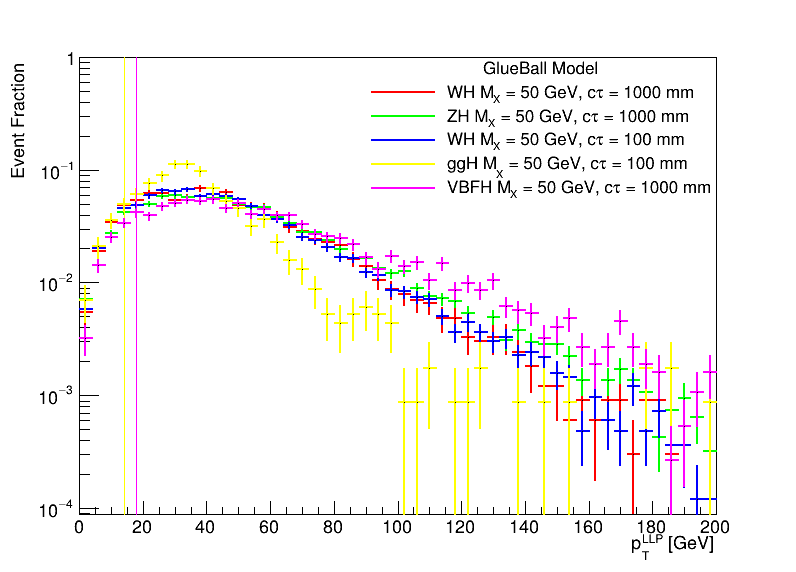

In [70]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

 
 
fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
#fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
#fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
#fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
#fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct1000mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 1000 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct1000mm'] = 'ZH M_{X} = 50 GeV, c#tau = 1000 mm'

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
line = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(min(len(b_pt),len(bhat_pt))):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['llp_pt'+str(k)] = create_TH1D(llp_pt, axis_title=['p_{T}^{LLP} [GeV]', 'Event Fraction'], name='', binning=[50,0,200])
    h['llp_pt'+str(k)].SetLineColor(cnt+2)
    h['llp_pt'+str(k)].SetStats(0)
    #h['llp_pt'+str(k)].SetMaximum(10*h['llp_pt'+str(k)].GetMaximum())
    h['llp_pt'+str(k)].Scale(1/h['llp_pt'+str(k)].Integral())
    h['llp_pt'+str(k)].SetLineWidth(2)
    h['llp_pt'+str(k)].SetMaximum(1)
    h['llp_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['llp_pt'+str(k)],str(label[k]),'l')
    
    #find threshold
    threshold = 0.1
    
    #print 'Integral of 1D histogram', h['llp_pt'+str(k)].Integral()
 
    
    #find_1d_thr(hist,BinNum, thr, from_beginning):
    bin_cut_begin, value_cut_begin = find_1d_thr(h['llp_pt'+str(k)],50, 0.1,1)
    #print 'bin_cut_begin',bin_cut_begin
    print 'value_cut_begin',value_cut_begin
    cut = value_cut_begin
    line[str(k)] = rt.TLine(cut,0,cut,1);
    line[str(k)].SetLineColor(cnt+2)
    line[str(k)].Draw('same');
    #h['llp_pt'+str(k)].Draw('same')
                                      
    print 'value_cut_begin from hist ',h['llp_pt'+str(k)].GetBinContent(bin_cut_begin)
    
    #h['llp_pt'+str(k)].Scale(1/h['llp_pt'+str(k)].Integral())
    #h['llp_pt'+str(k)].Draw('same')
    
    bin_cut_end, value_cut_end = find_1d_thr(h['llp_pt'+str(k)],50, 0.1,0)
    #print 'bin_cut_end',bin_cut_end
    print 'value_cut_end',value_cut_end
    #print 'value_cut_end from hist ',h['llp_pt'+str(k)].GetBinCenter(bin_cut_end)
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_pt_cut.png')



 
 